Want to implement 3 types of scoring:
- Range of diversity
- Distribution of diversity across region
- Conservation of seed sequence relate to diversified sequence

In [1]:
#Import useful packages
import numpy as np
import os
import seaborn as sns
import scipy.cluster

In [2]:
#Set working directory
workingdir = os.getcwd()

#Initialize lists for data and file names
names = []
fastadata = []

#Iterate through files, store data in lists
for file in os.listdir(workingdir):
    if file.endswith(".fasta"):
        #Append file name to list
        names.append(file)
        with open(file, 'r') as f:
            #Append reads as list to list
            seqs = f.read().splitlines()
            fastadata.append(seqs[1::2])

In [3]:
#Define helper function for Hamming distance:
def hamdist(str1, str2):    
    '''
    Inputs: 
        str1: String of some length
        str2: Another string of the same length as str1
        
    Outputs: 
        Returns Hamming distance, which is the number of differences
        between the two strings
    ''' 
    diffs = 0
    for ch1, ch2 in zip(str1, str2):
        if ch1 != ch2:
            if not (ch1 == "T" and ch2 == "U"):
                if not (ch1 == "U" and ch2 == "T"):
                    diffs += 1
    return diffs

DivSeq_Sys1303.fasta


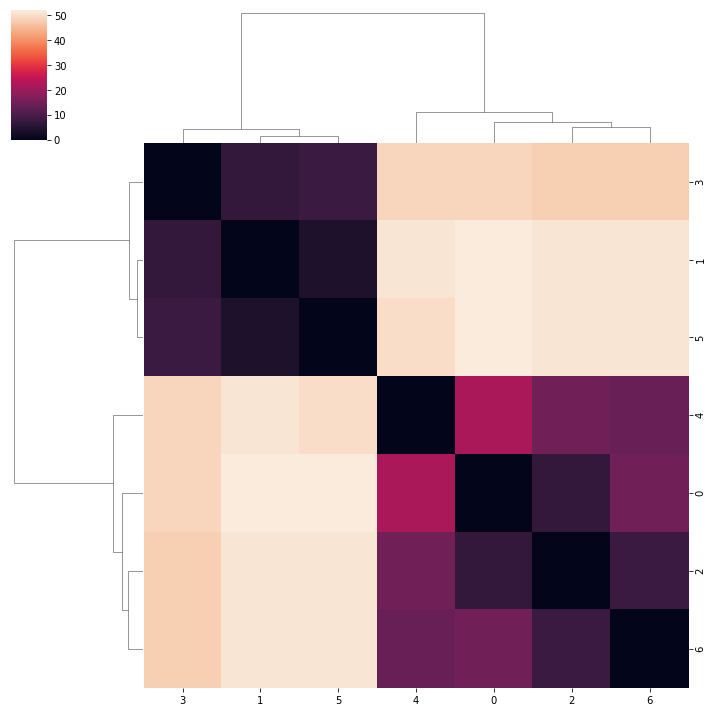

In [13]:
#Plot edit distance matrix for a single system
index = 14
name = names[index]
file = fastadata[index]
#Initialize and propagate entries in distance matrix
distancematrix = np.zeros((len(file),len(file)))
for i in range(len(file)):
    for j in range(len(file)-i):
        distance = hamdist(file[i], file[len(file)-j-1])
        distancematrix[i, len(file)-j-1] = distance
        distancematrix[len(file)-j-1, i] = distance

print(name)
sns.clustermap(distancematrix)

/Users/dli/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/dli/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:771: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.fig = plt.figure(figsize=figsize)


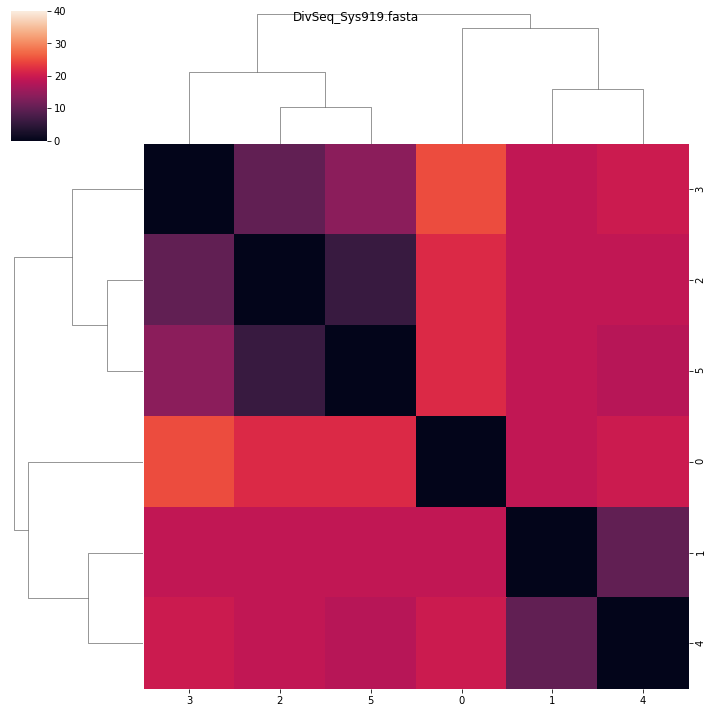

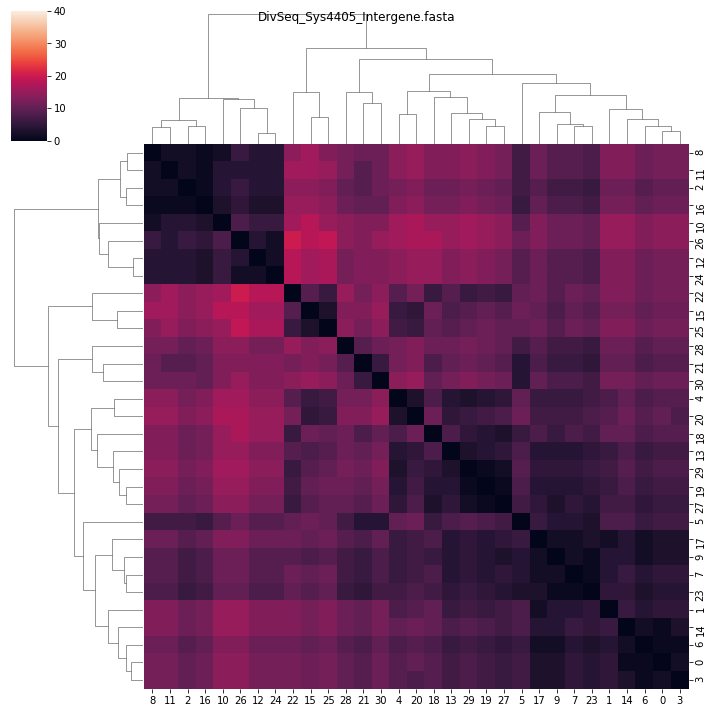

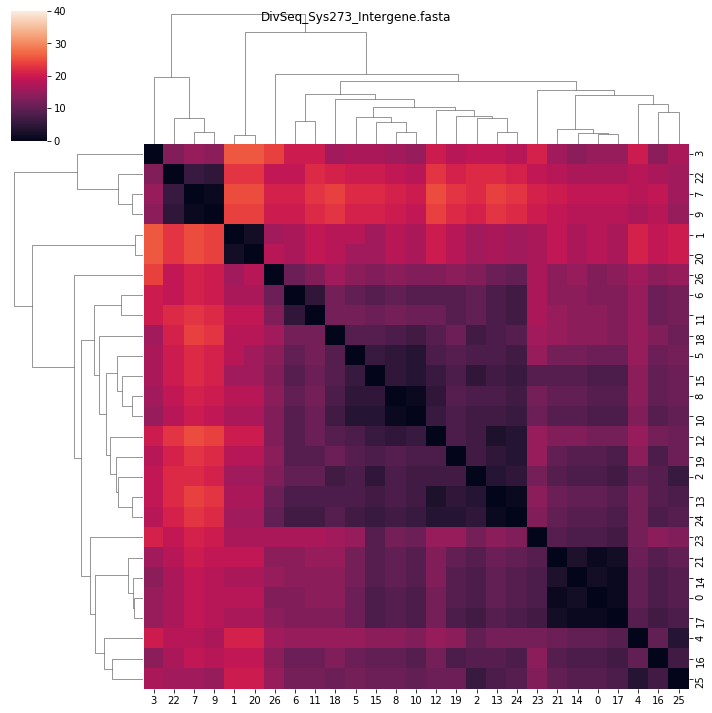

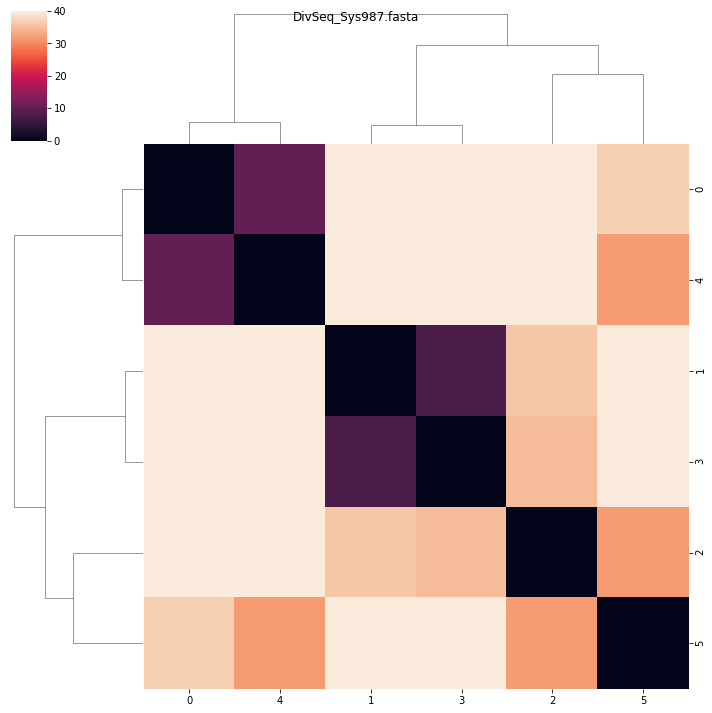

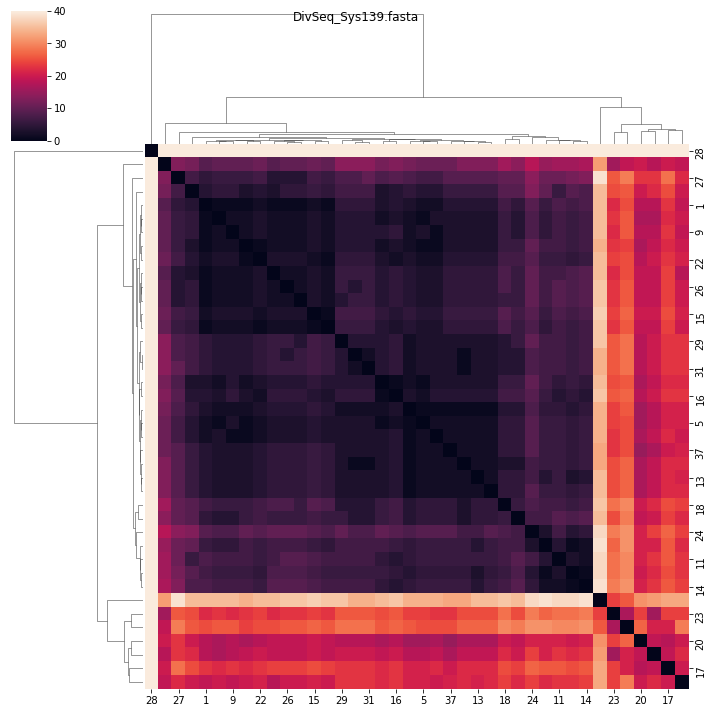

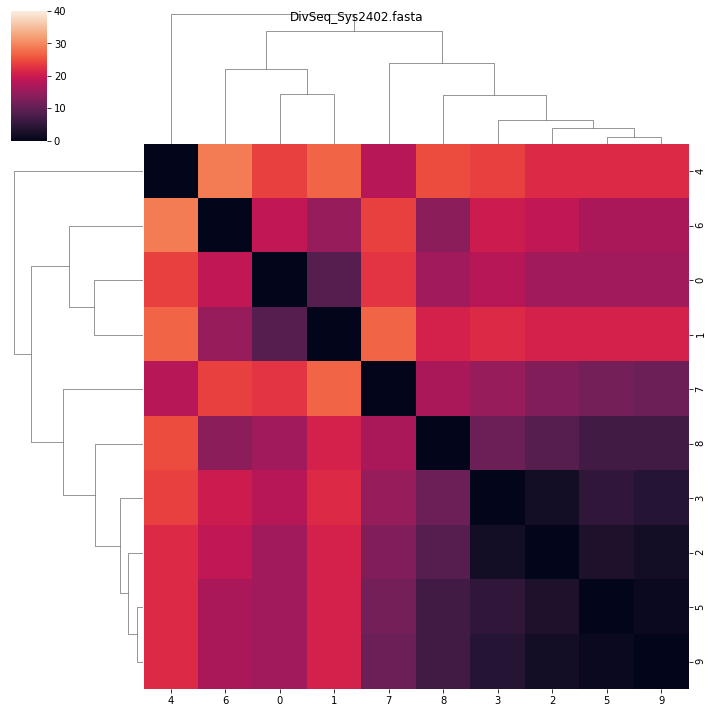

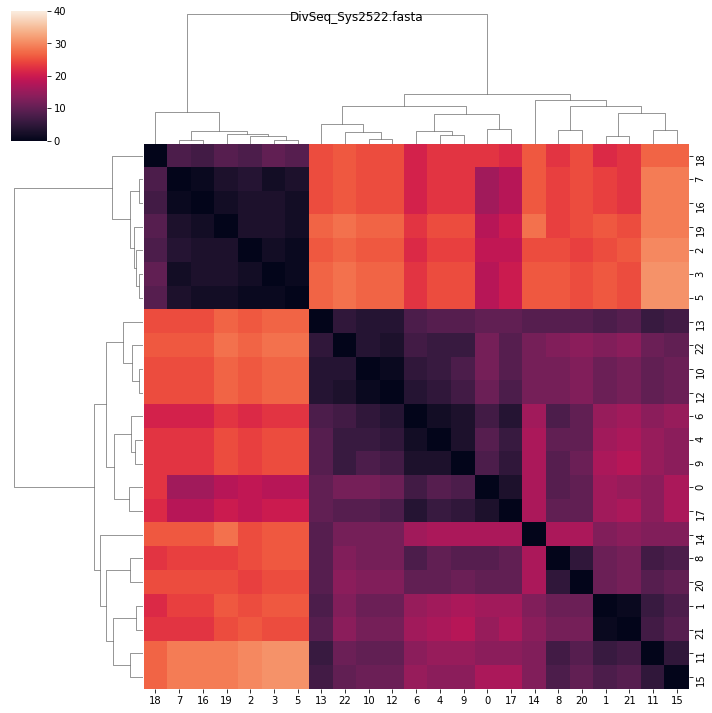

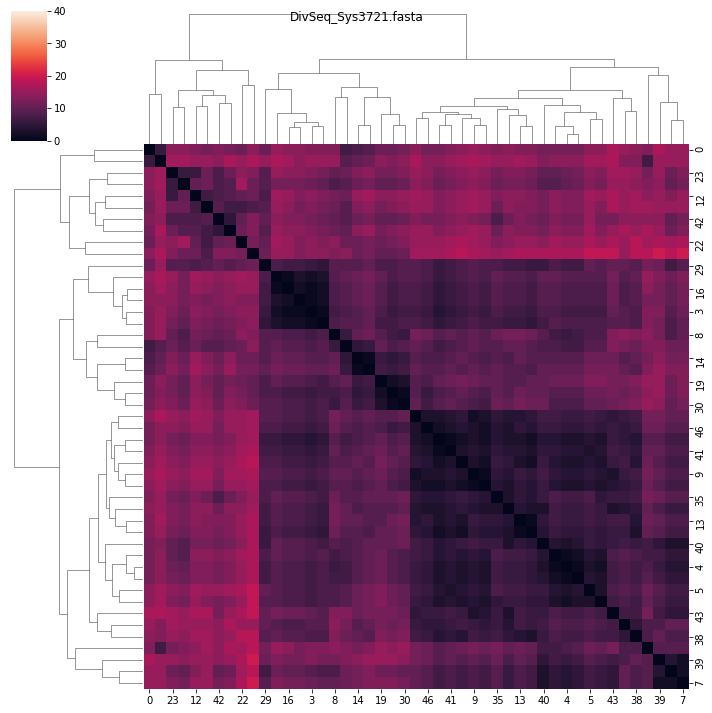

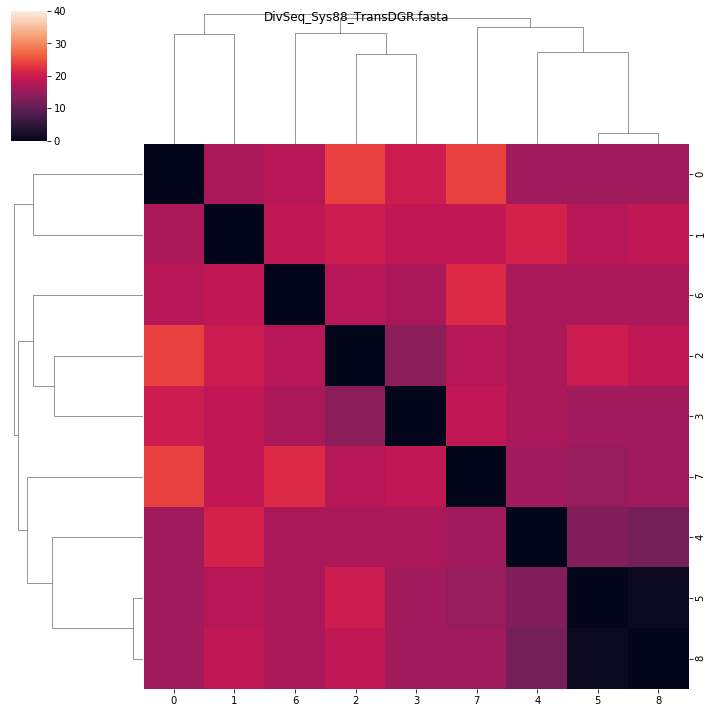

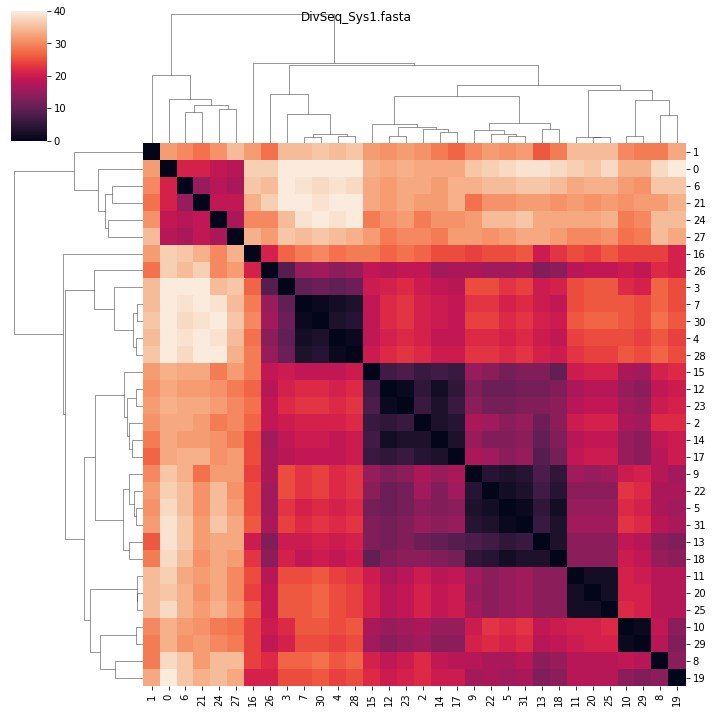

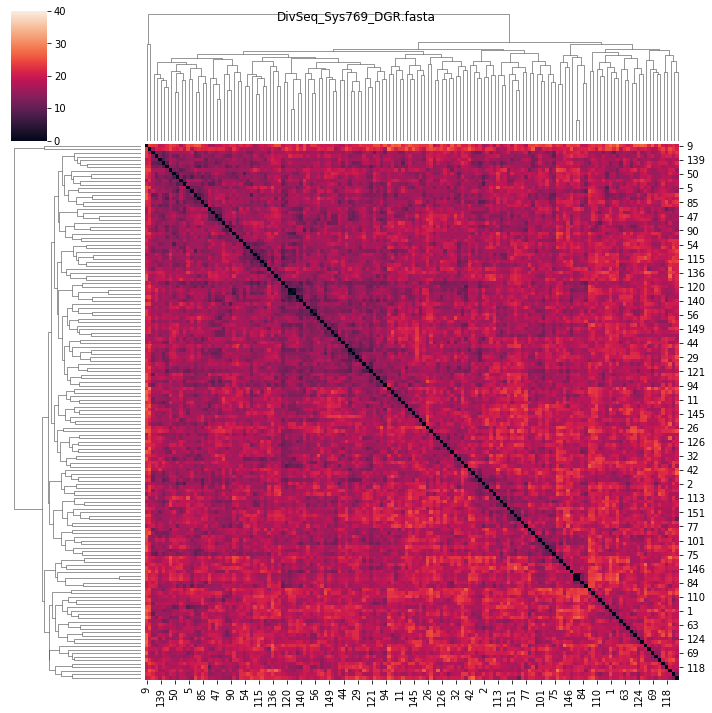

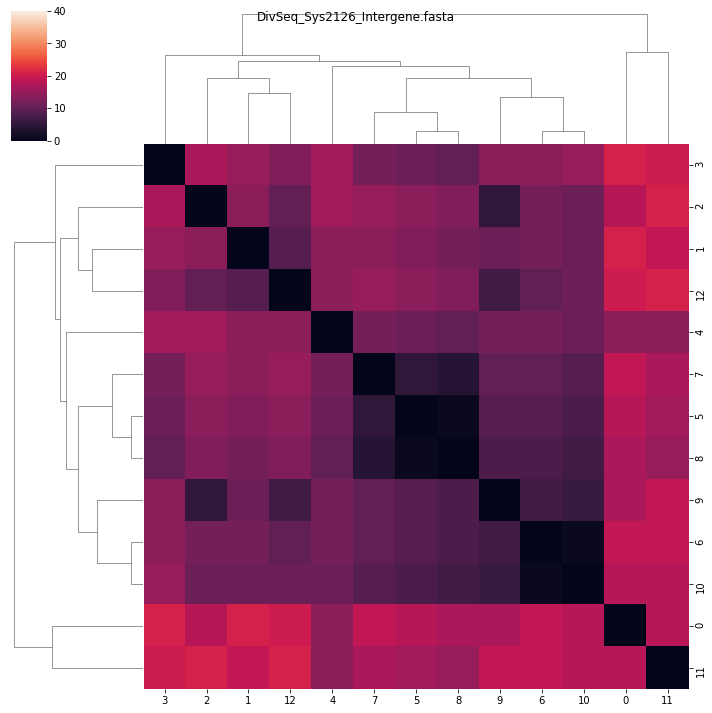

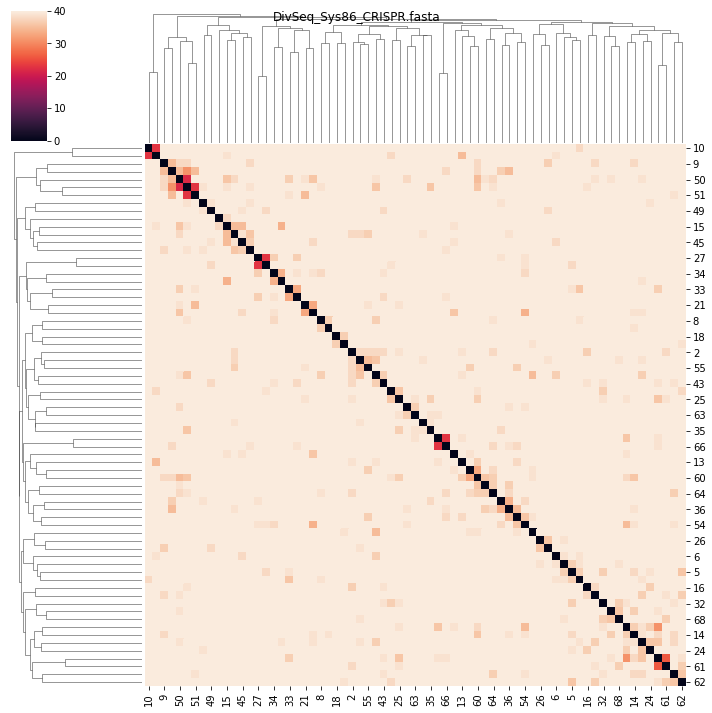

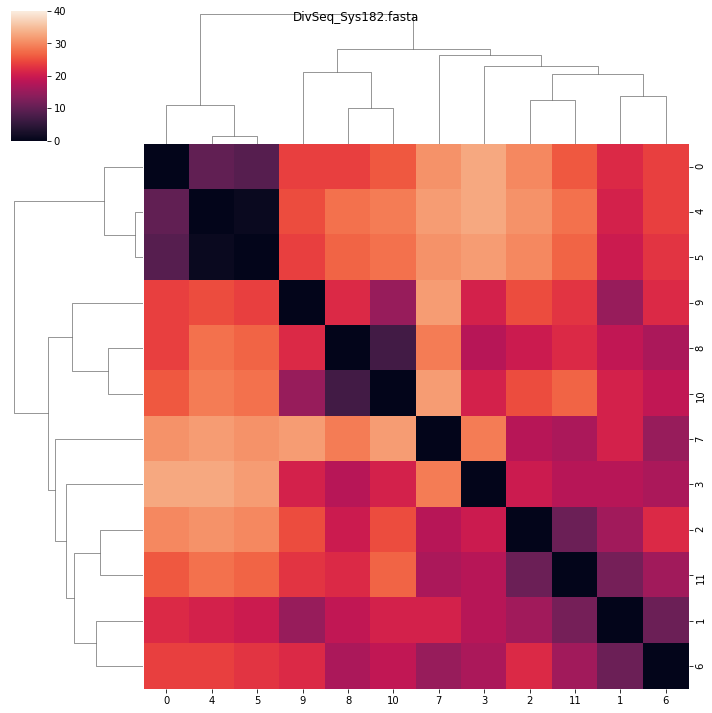

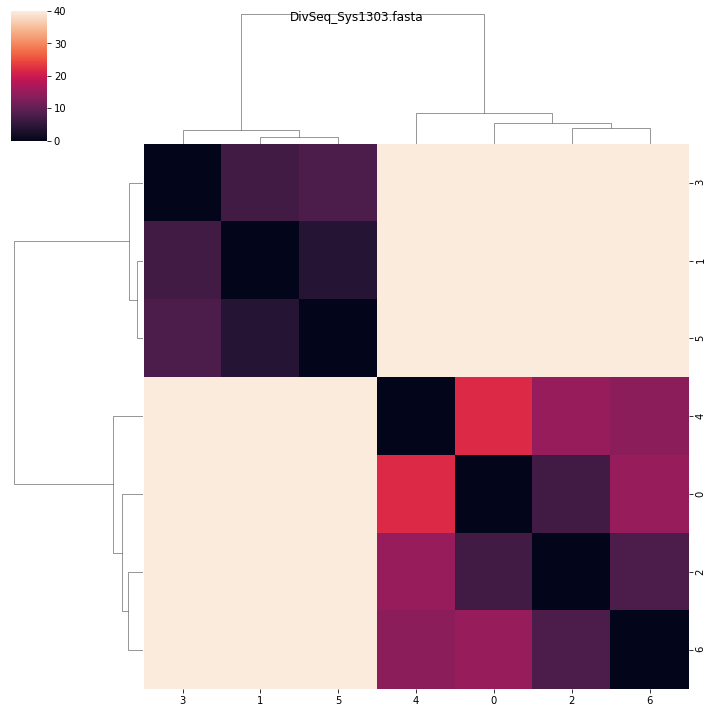

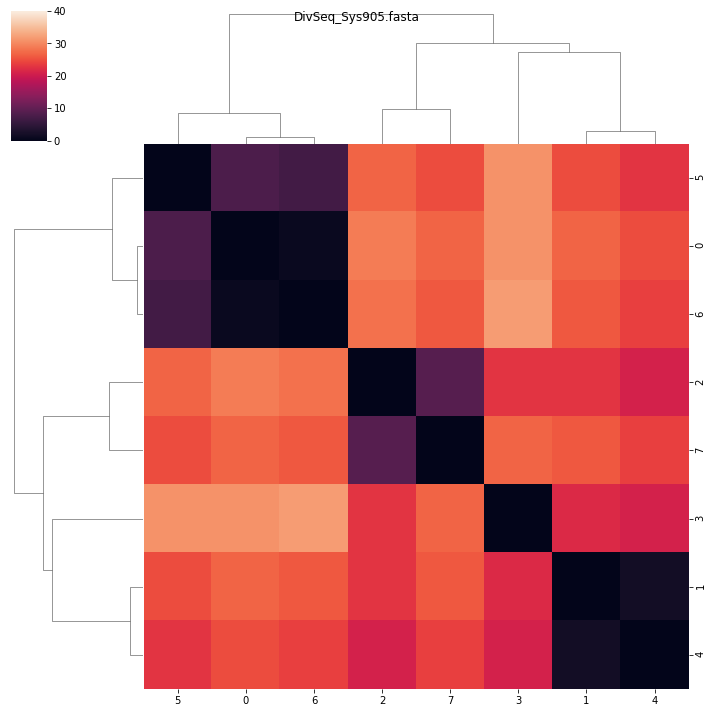

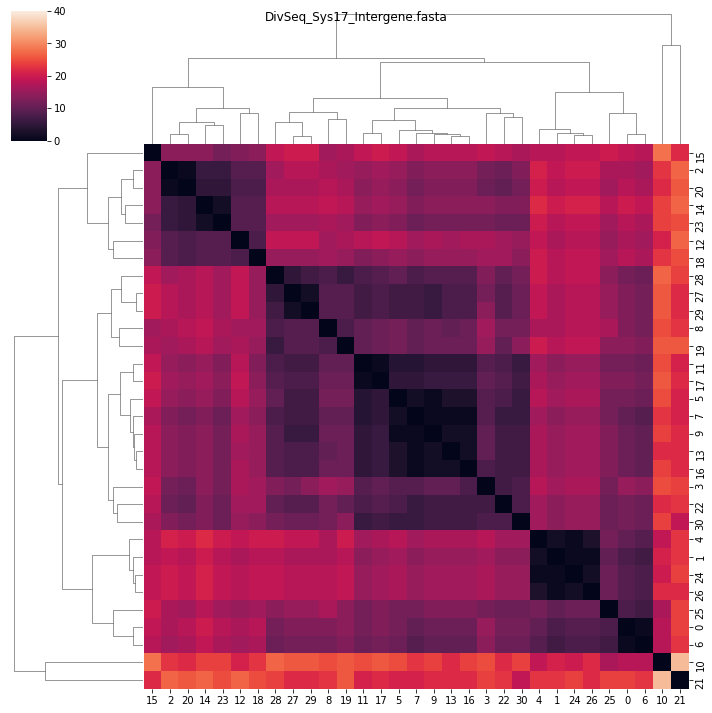

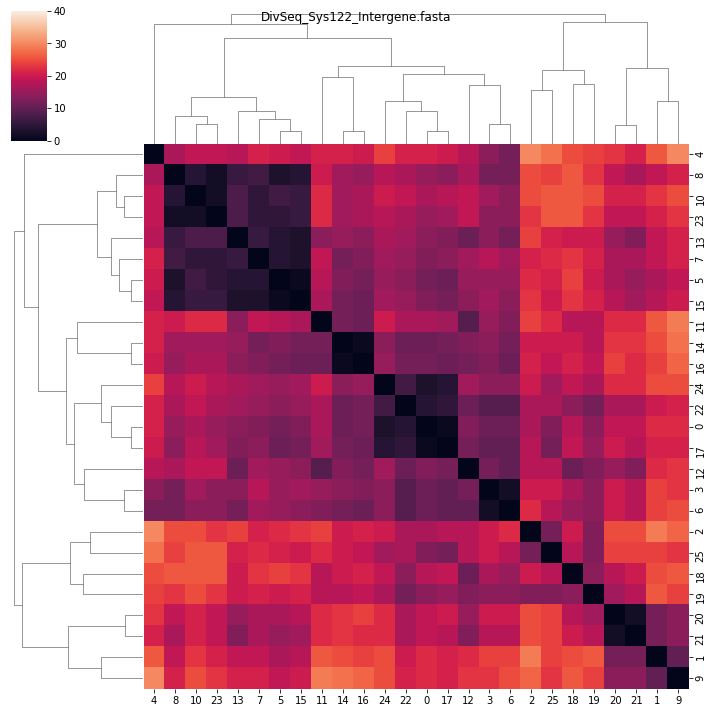

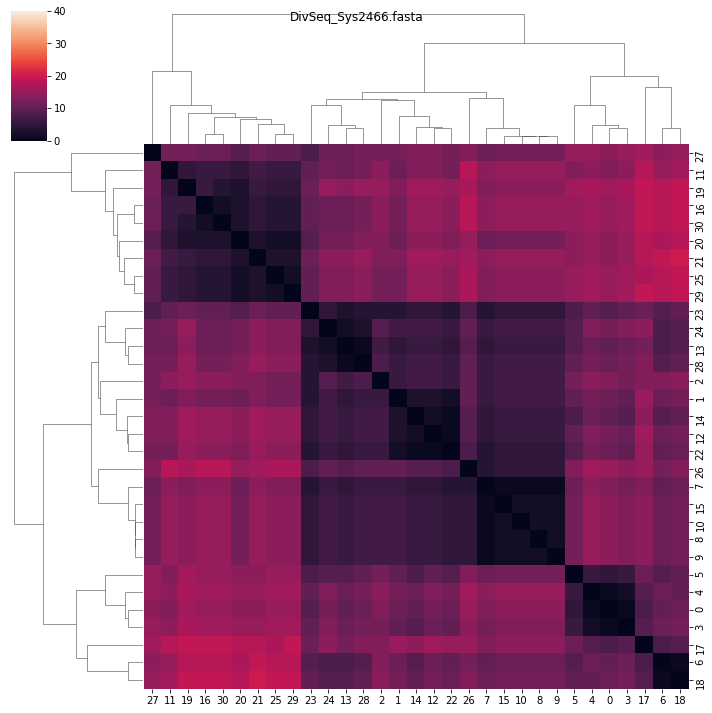

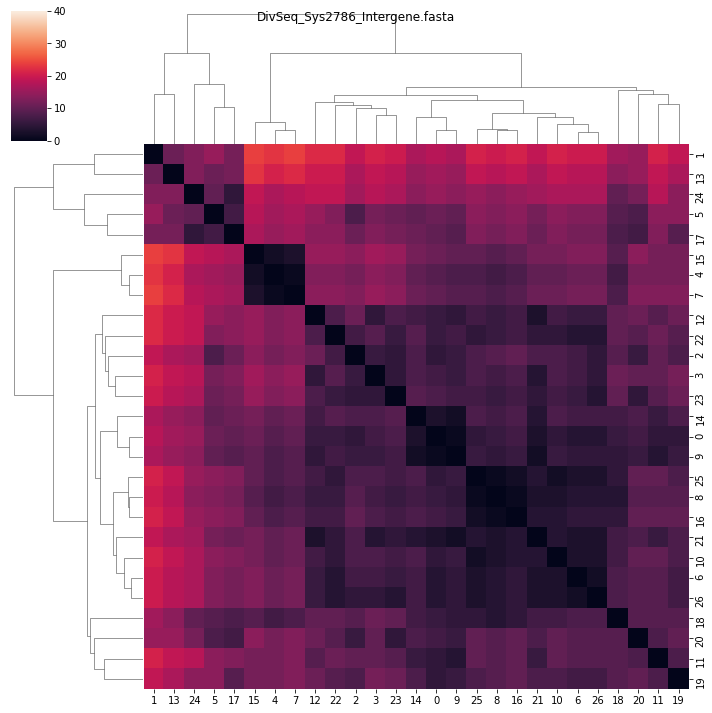

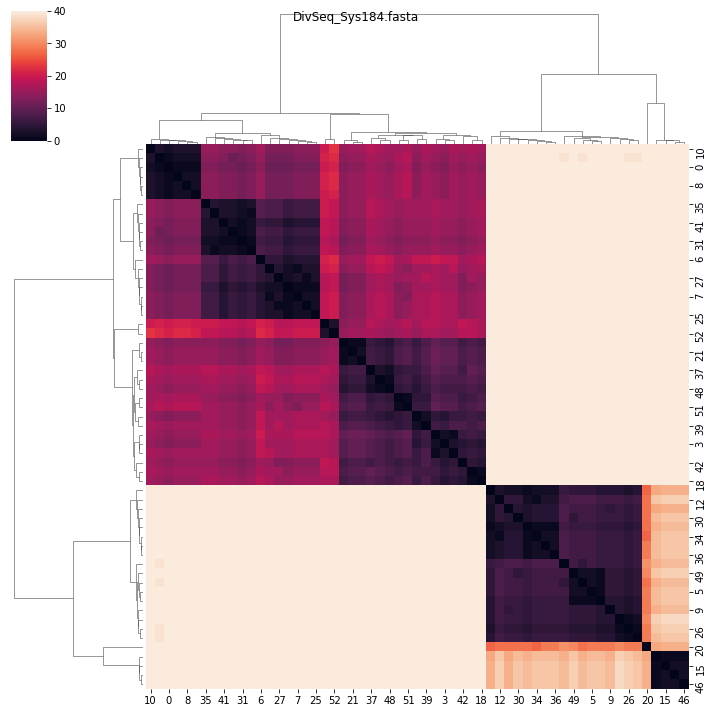

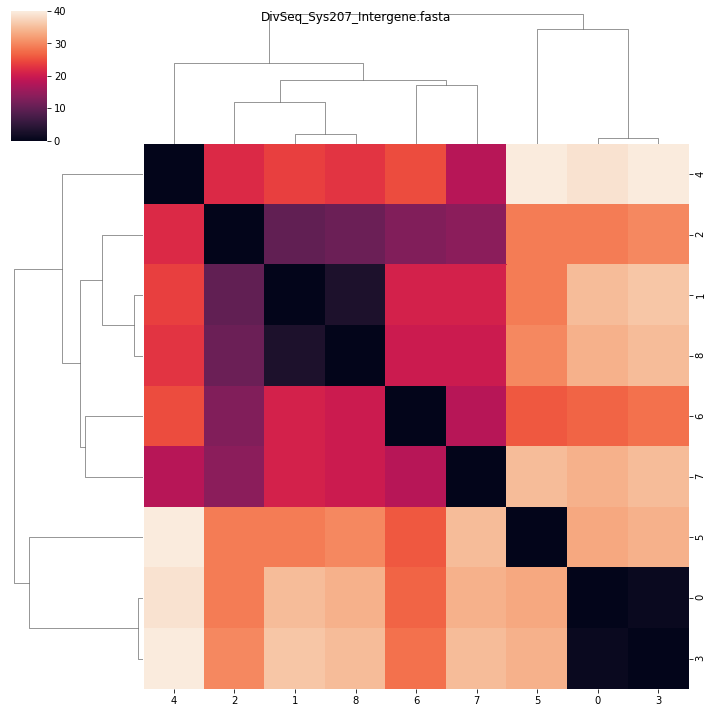

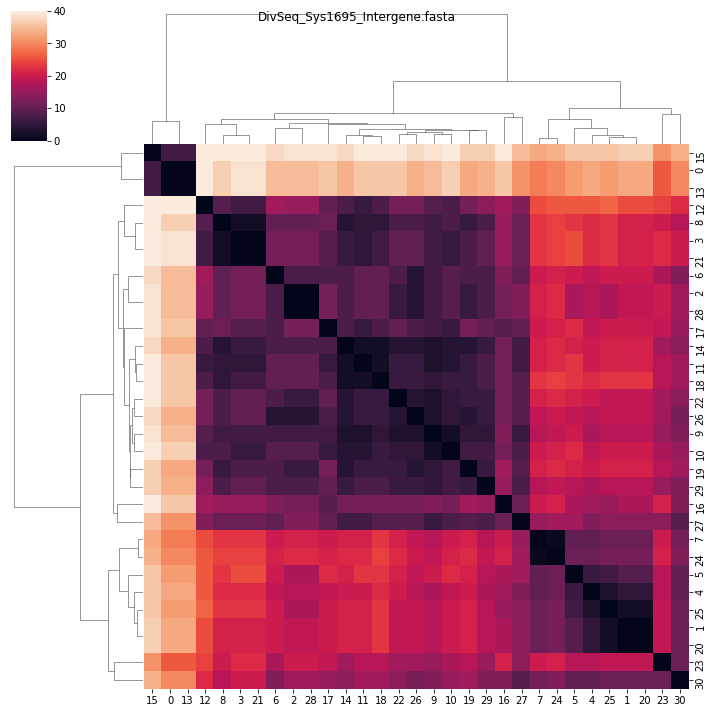

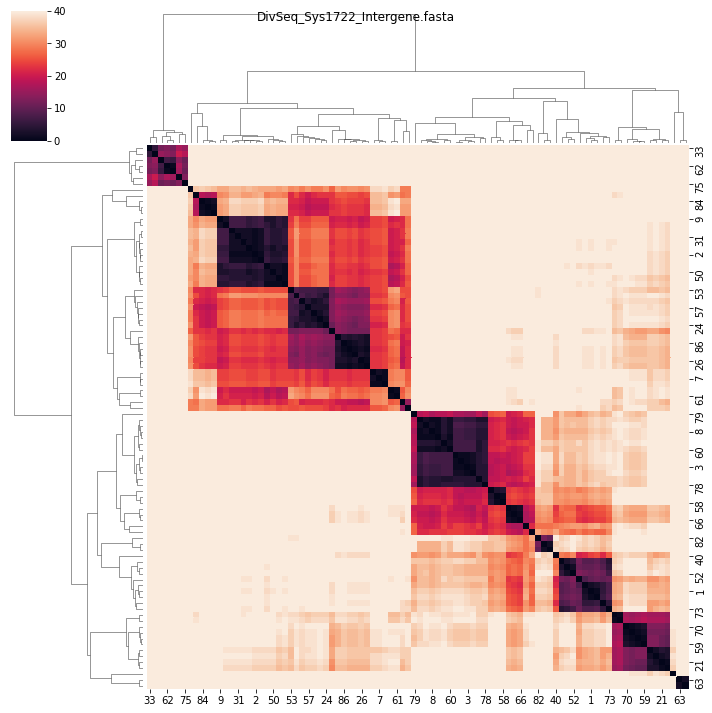

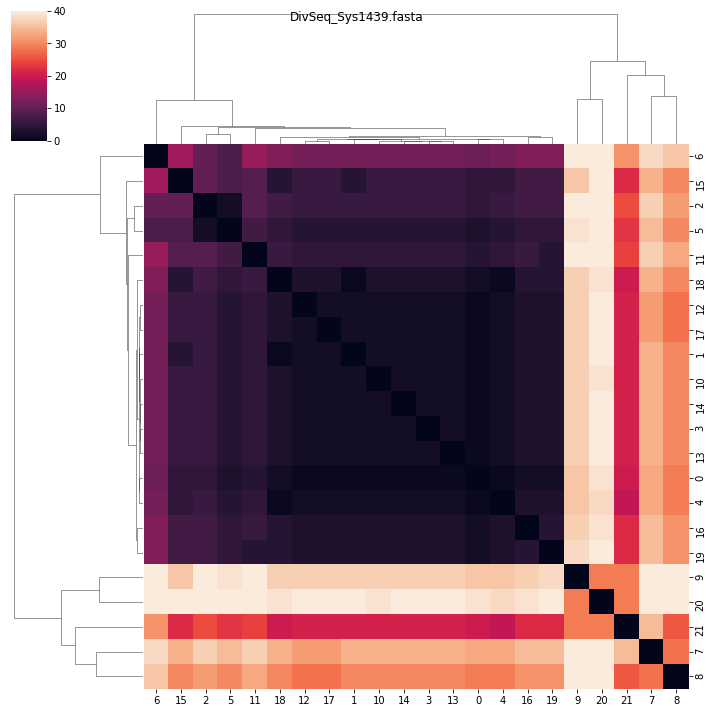

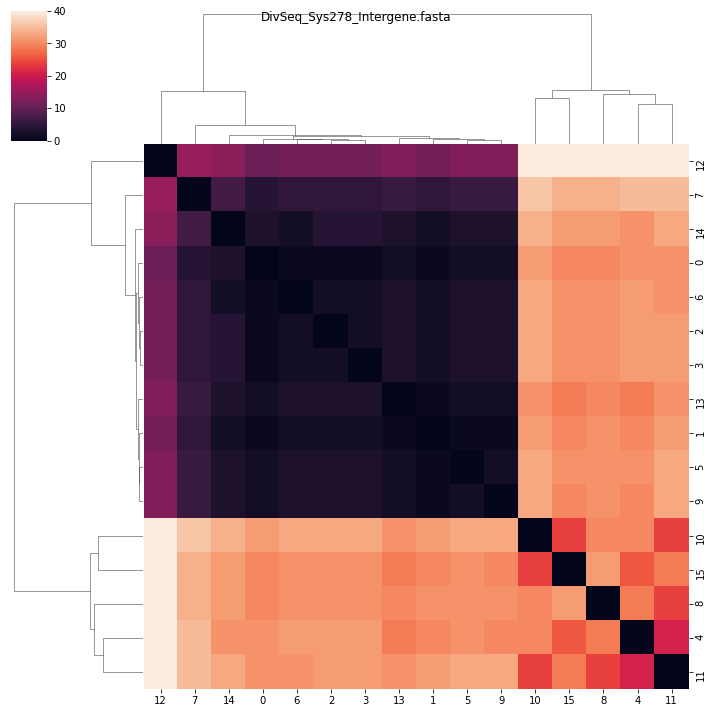

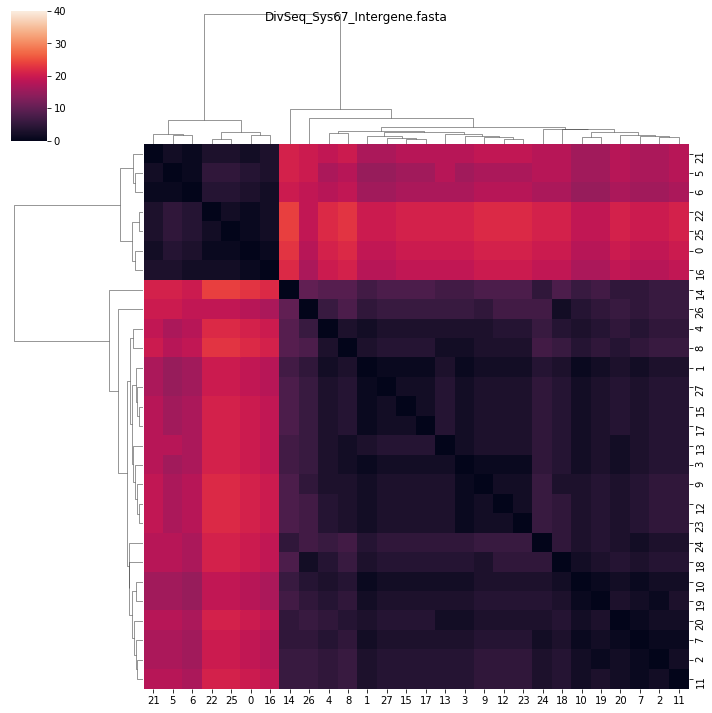

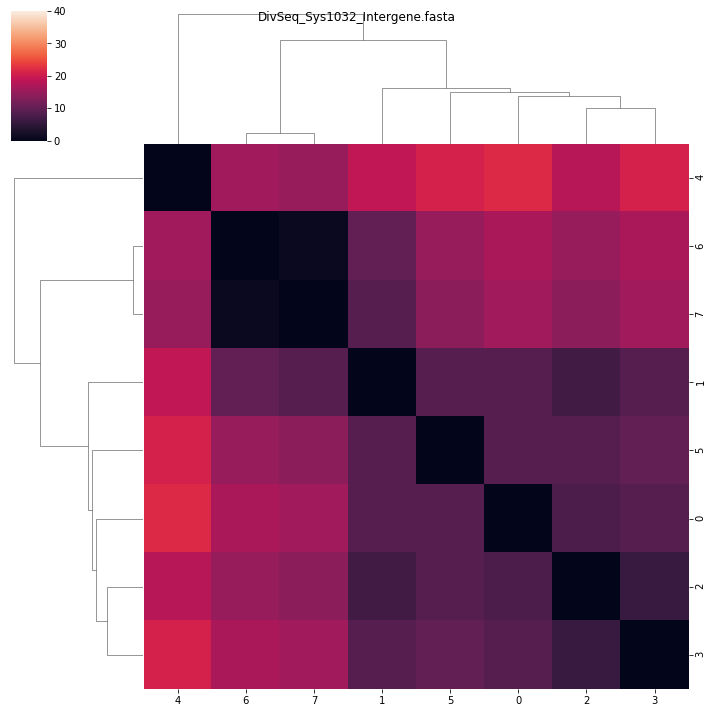

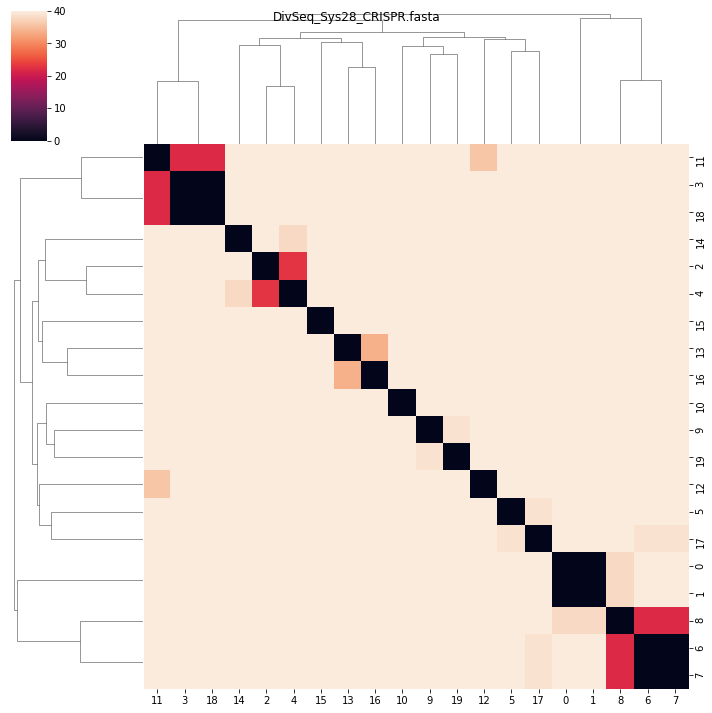

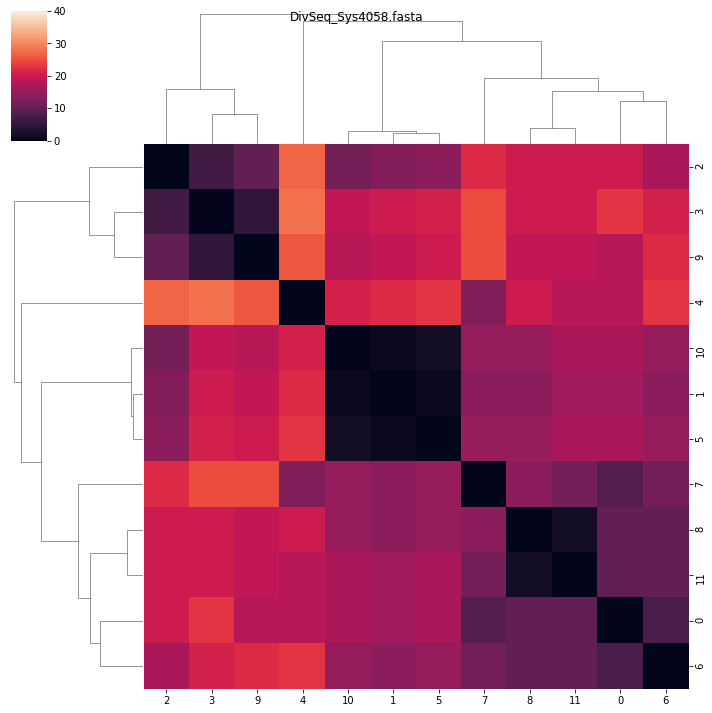

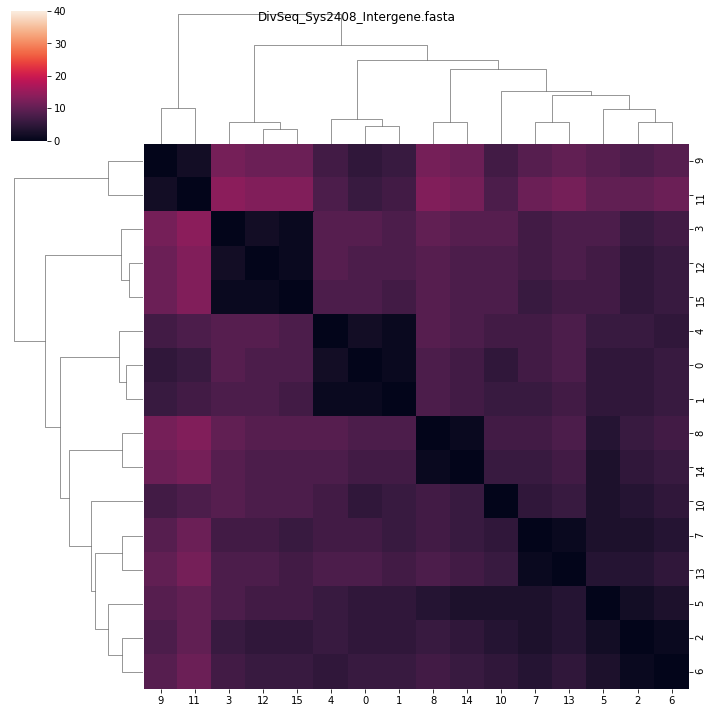

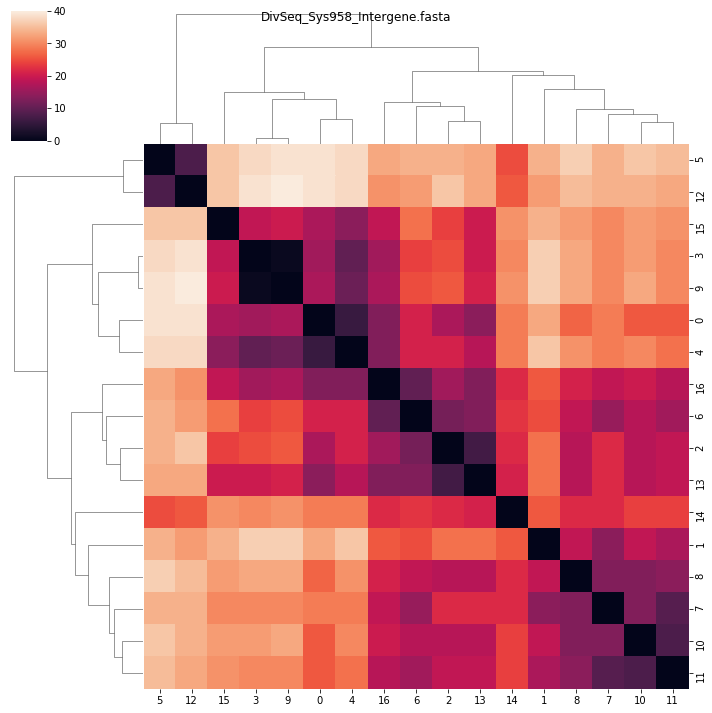

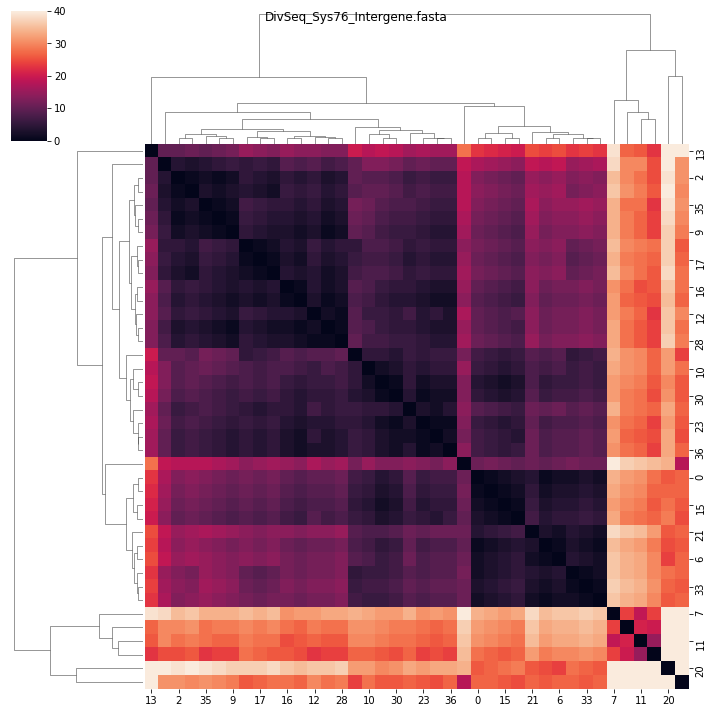

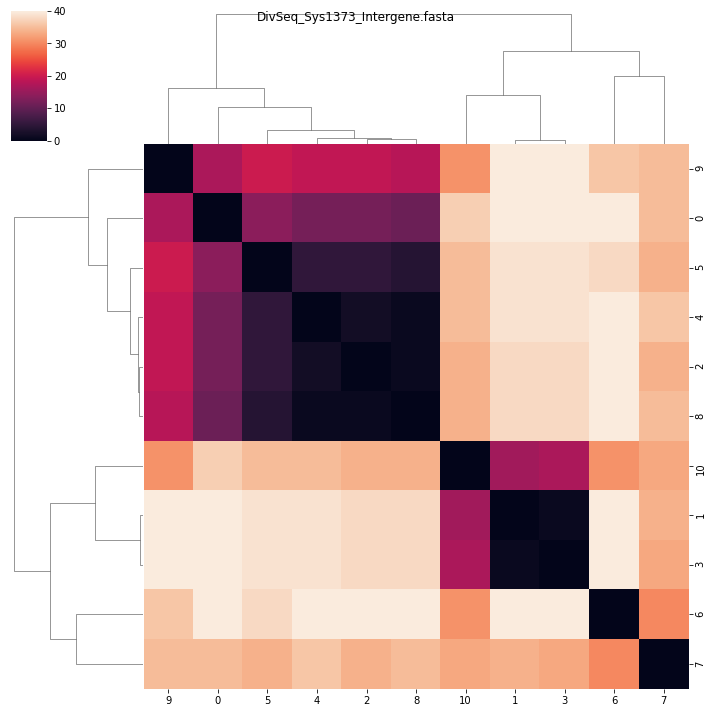

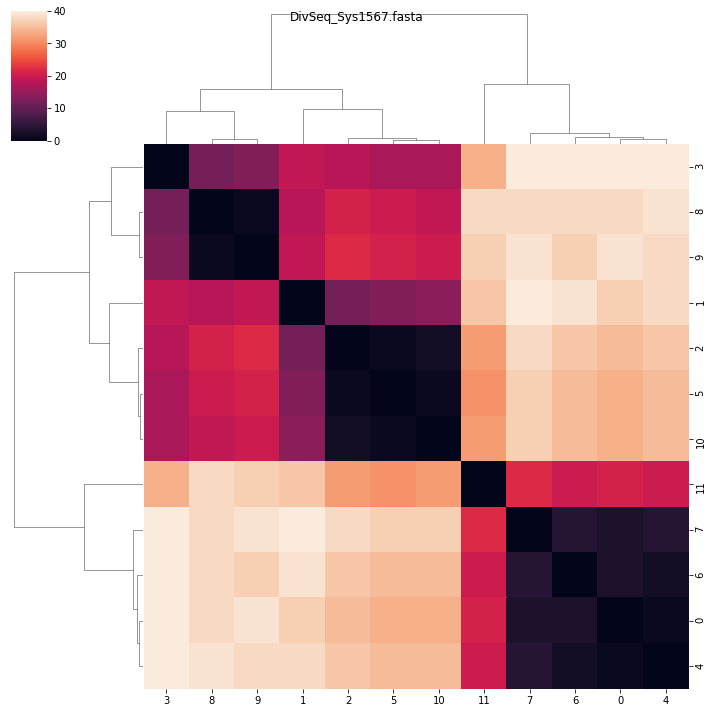

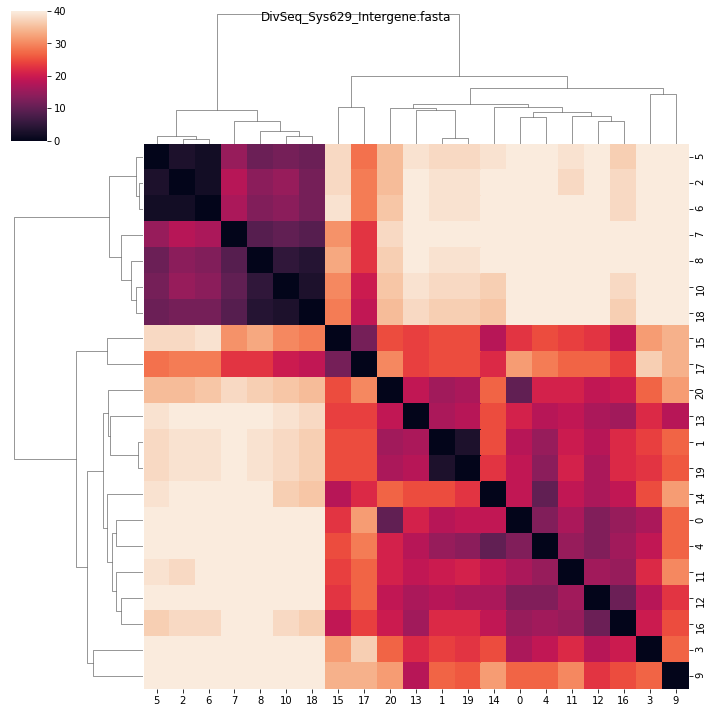

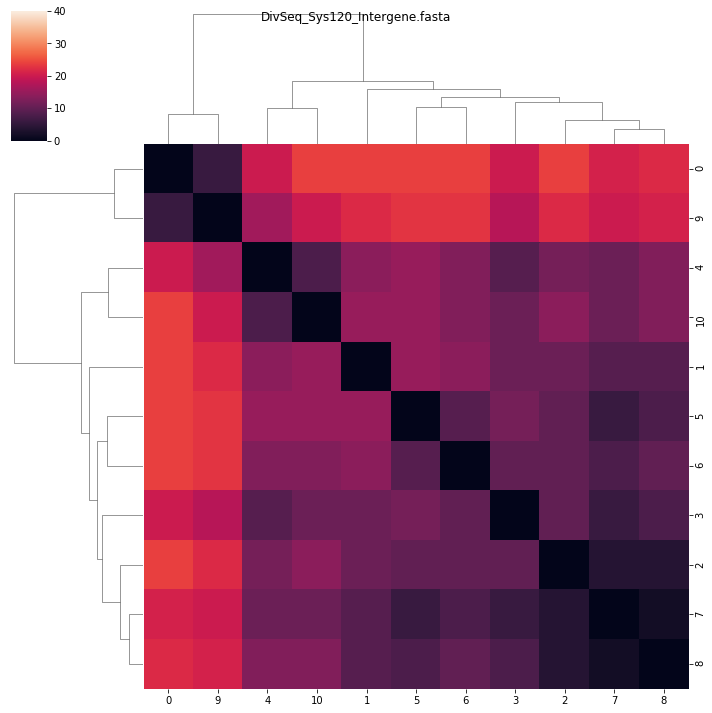

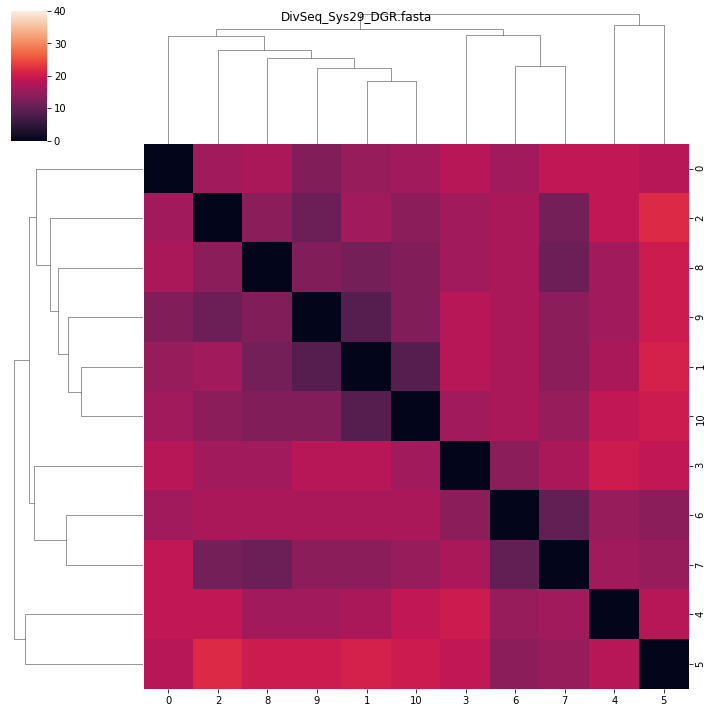

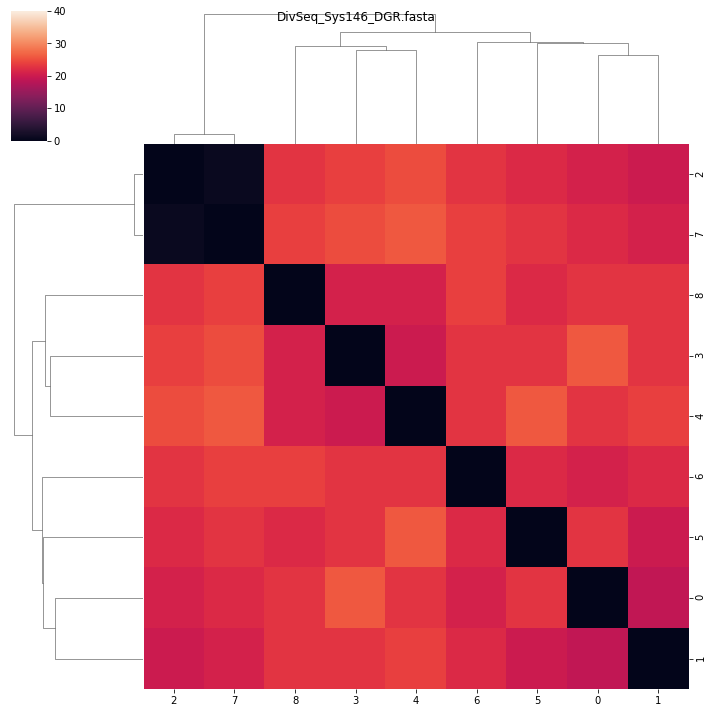

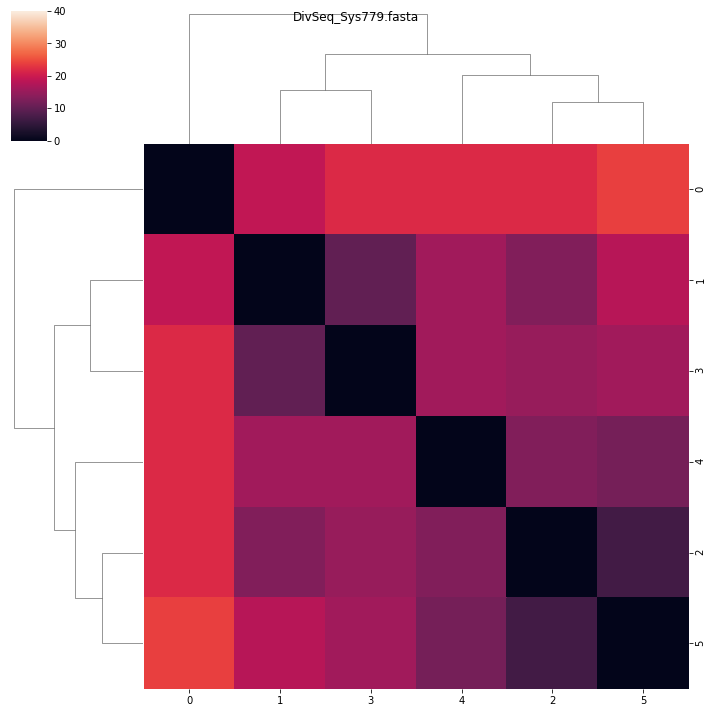

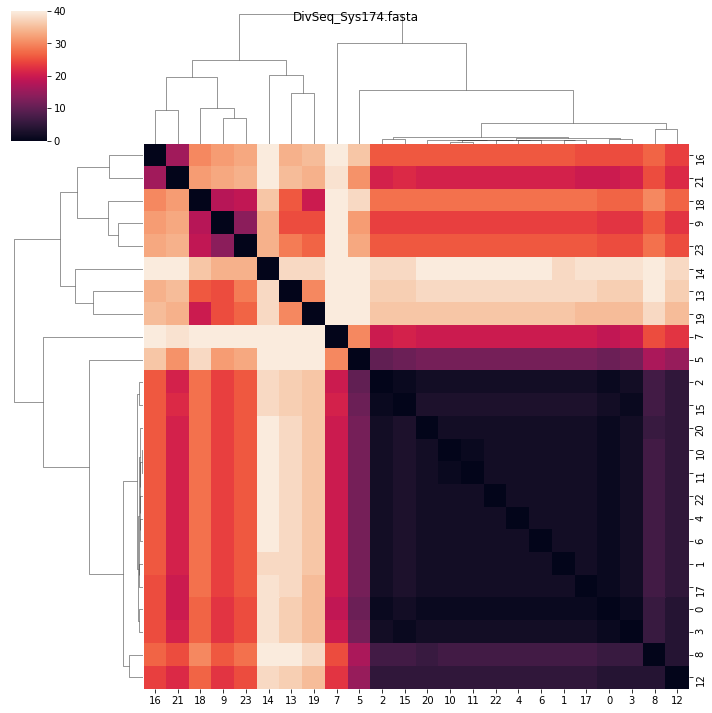

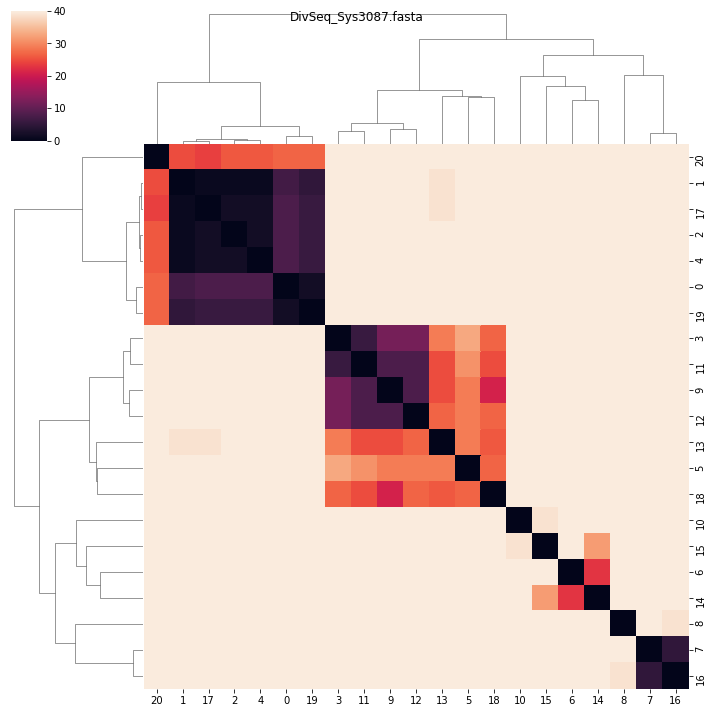

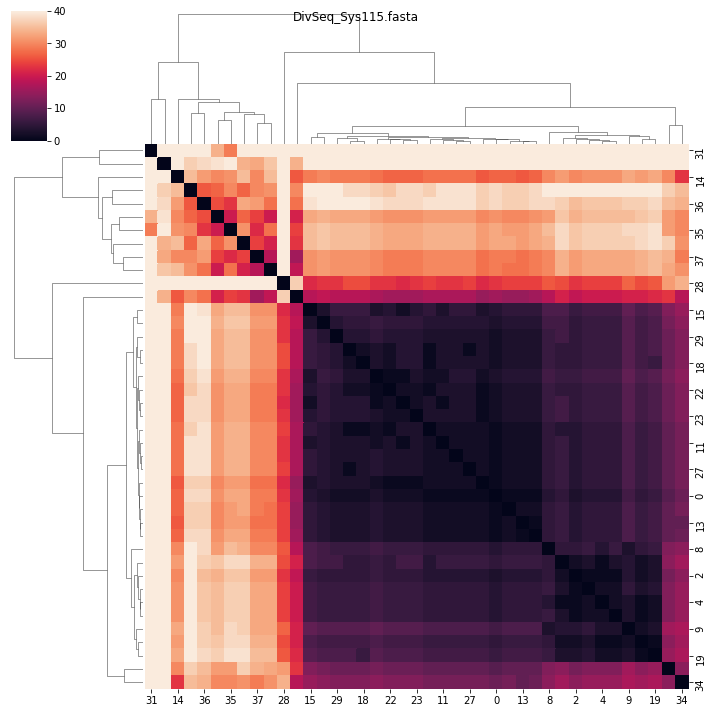

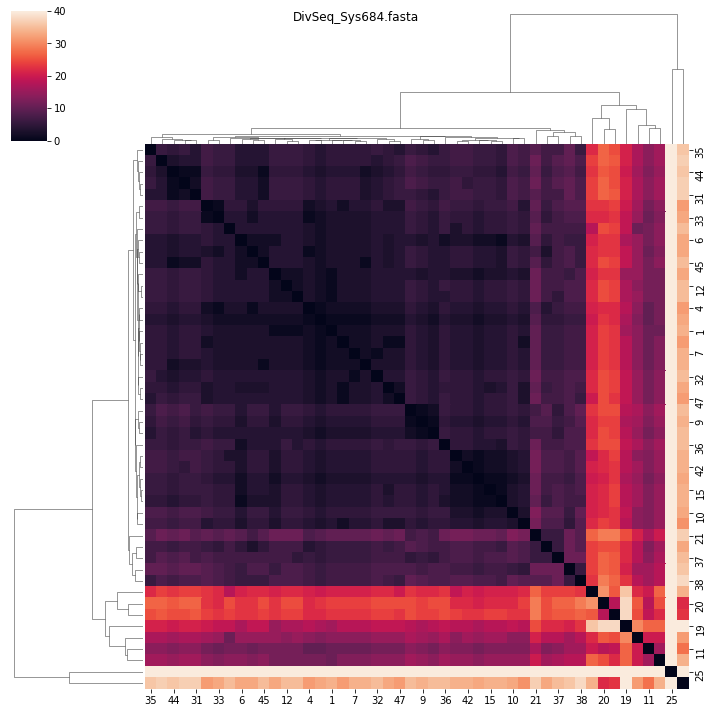

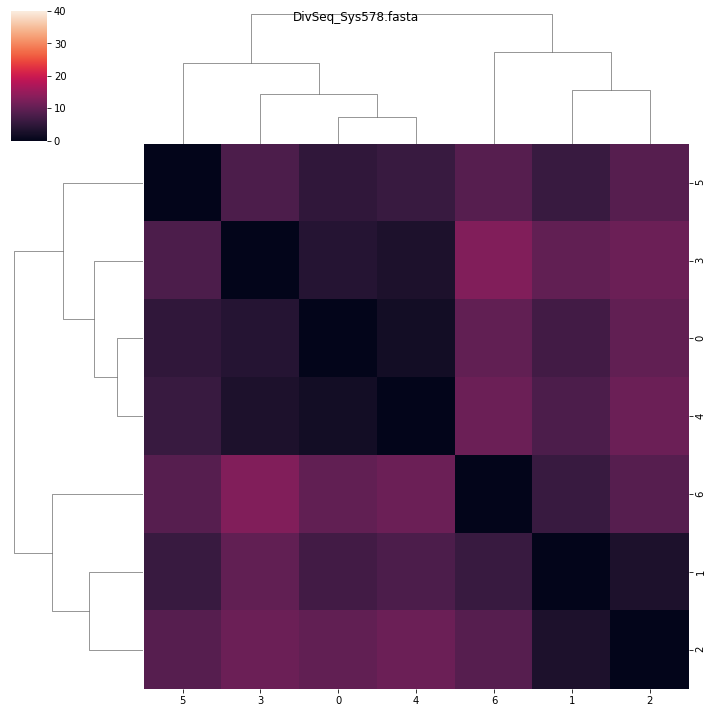

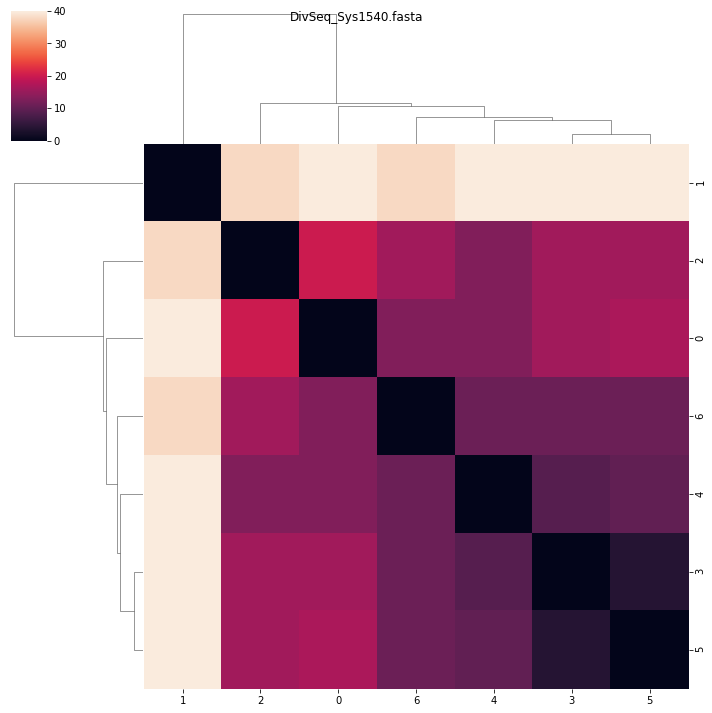

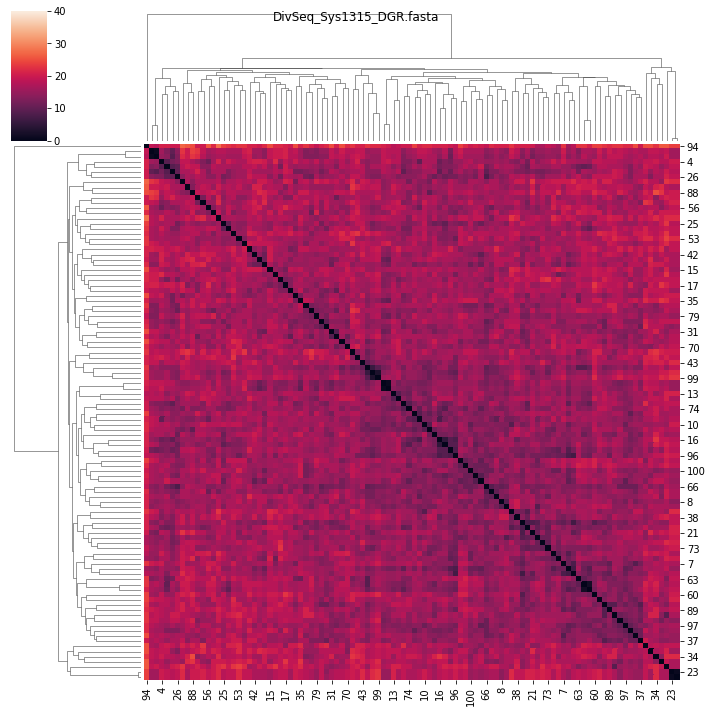

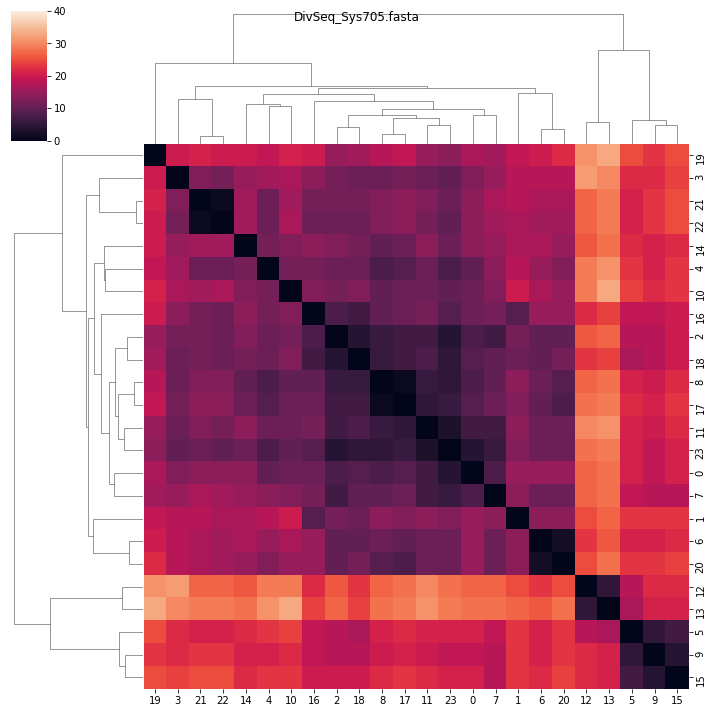

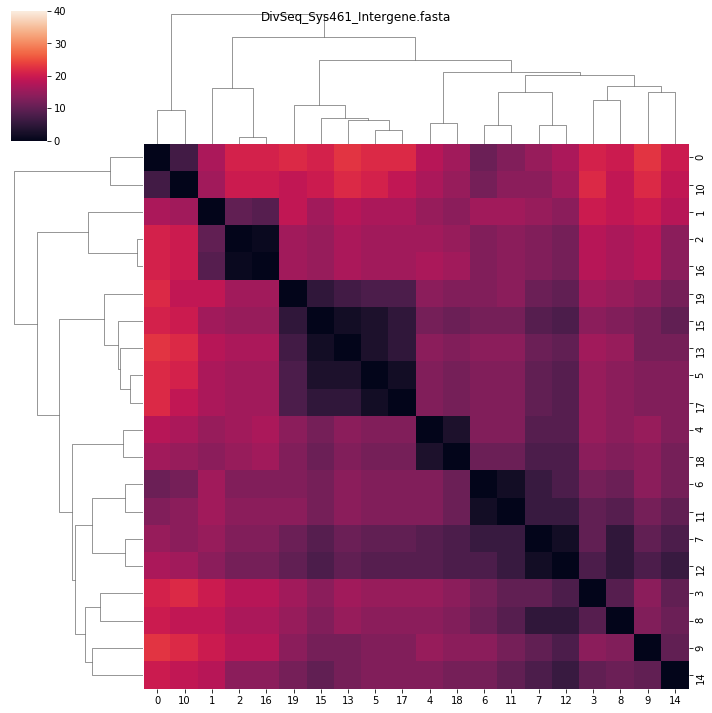

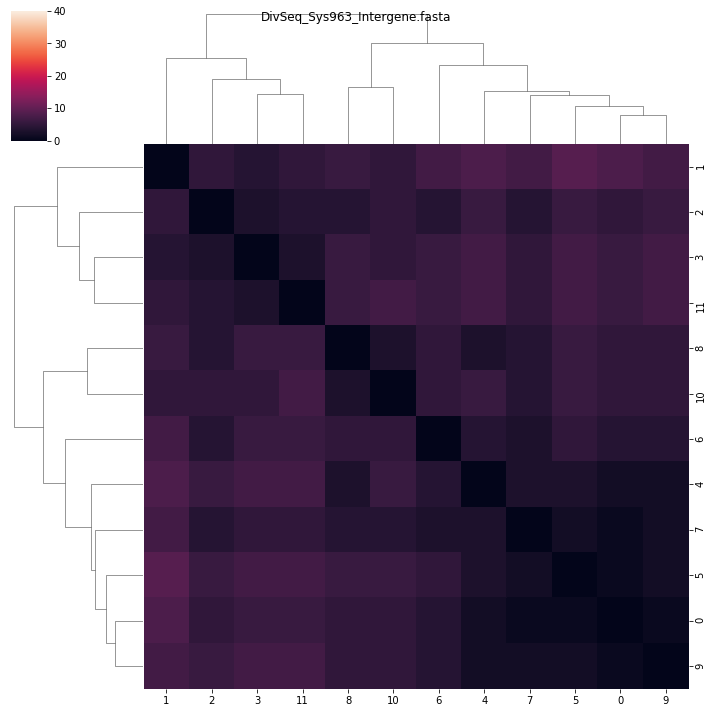

In [5]:
#Plot edit distance matrix for all systems
for index in range(len(names)):
    name = names[index]
    file = fastadata[index]
    #Initialize and propagate entries in distance matrix
    distancematrix = np.zeros((len(file),len(file)))
    for i in range(len(file)):
        for j in range(len(file)-i):
            distance = hamdist(file[i], file[len(file)-j-1])
            distancematrix[i, len(file)-j-1] = distance
            distancematrix[len(file)-j-1, i] = distance
    sns.clustermap(distancematrix, vmin = 0, vmax = 40).fig.suptitle(name) 

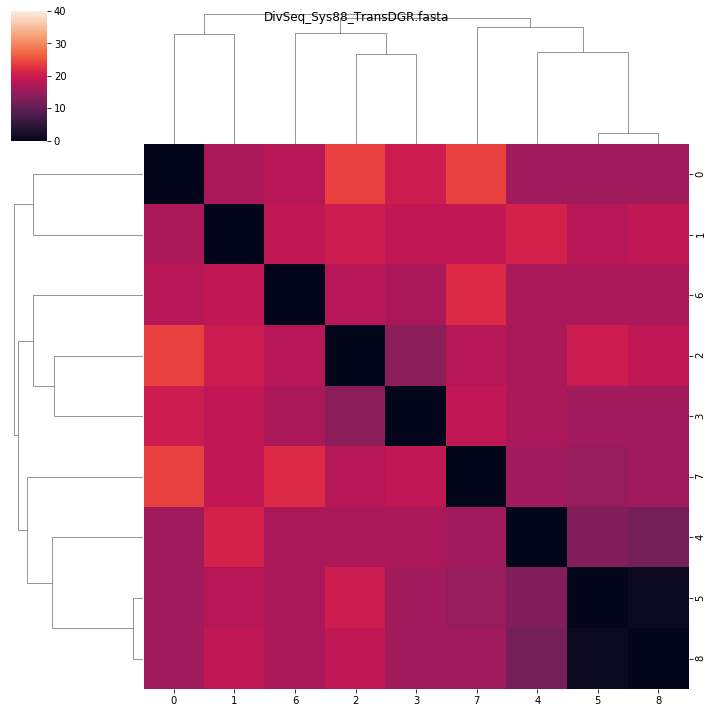

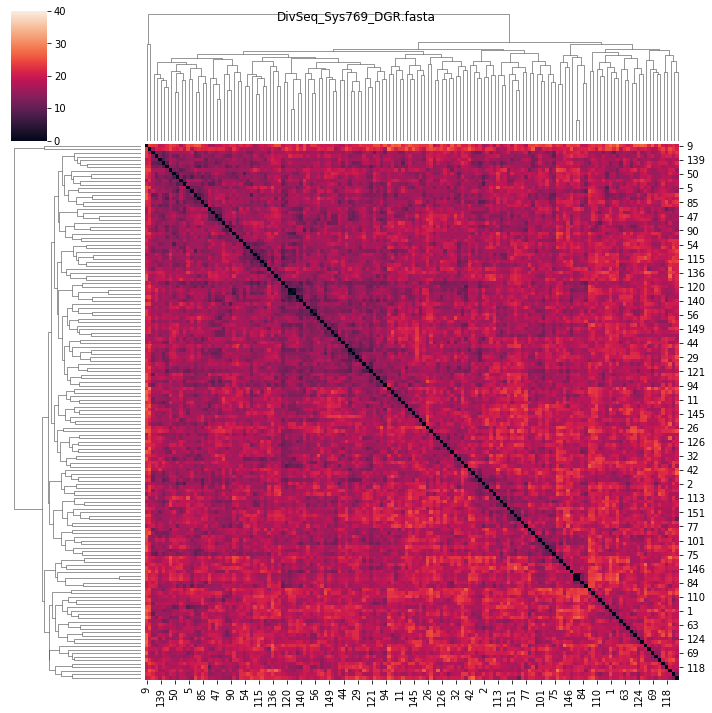

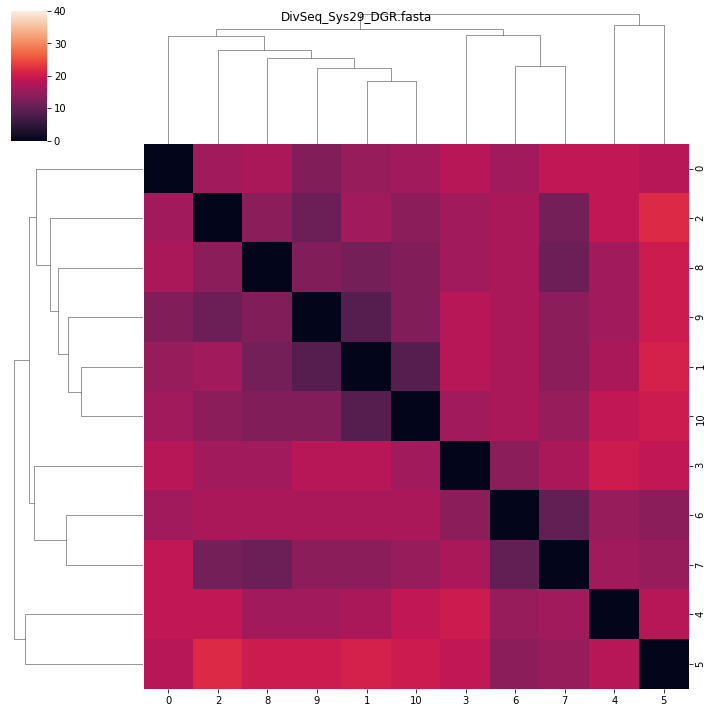

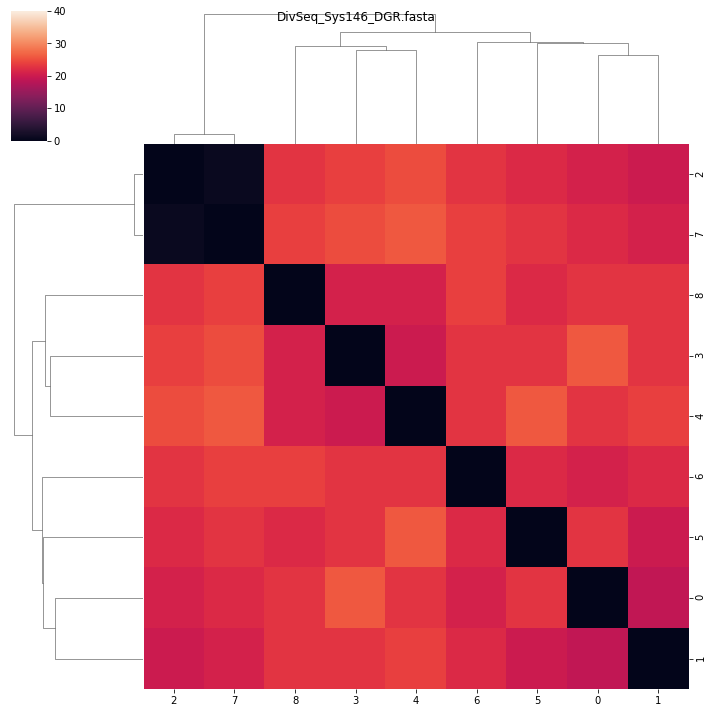

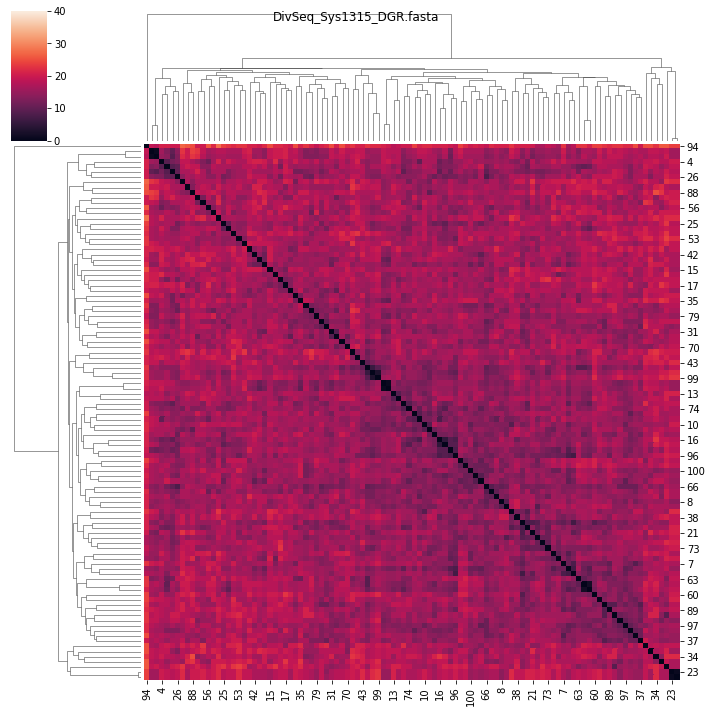

In [6]:
#Plot edit distance matrix for only DGRs
for index in range(len(names)):
    if names[index].endswith("DGR.fasta"):
        name = names[index]
        file = fastadata[index]
        #Initialize and propagate entries in distance matrix
        distancematrix = np.zeros((len(file),len(file)))
        for i in range(len(file)):
            for j in range(len(file)-i):
                distance = hamdist(file[i], file[len(file)-j-1])
                distancematrix[i, len(file)-j-1] = distance
                distancematrix[len(file)-j-1, i] = distance
        sns.clustermap(distancematrix, vmin = 0, vmax = 40).fig.suptitle(name) 

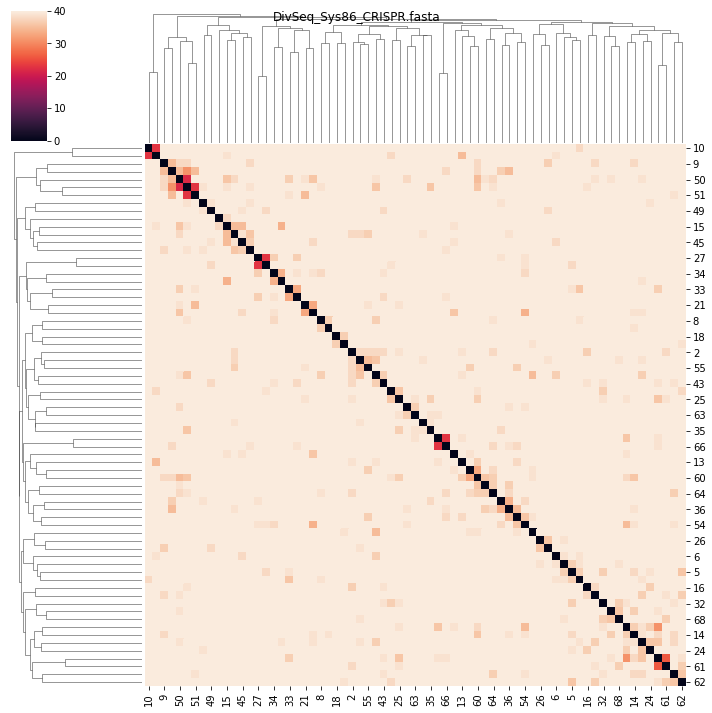

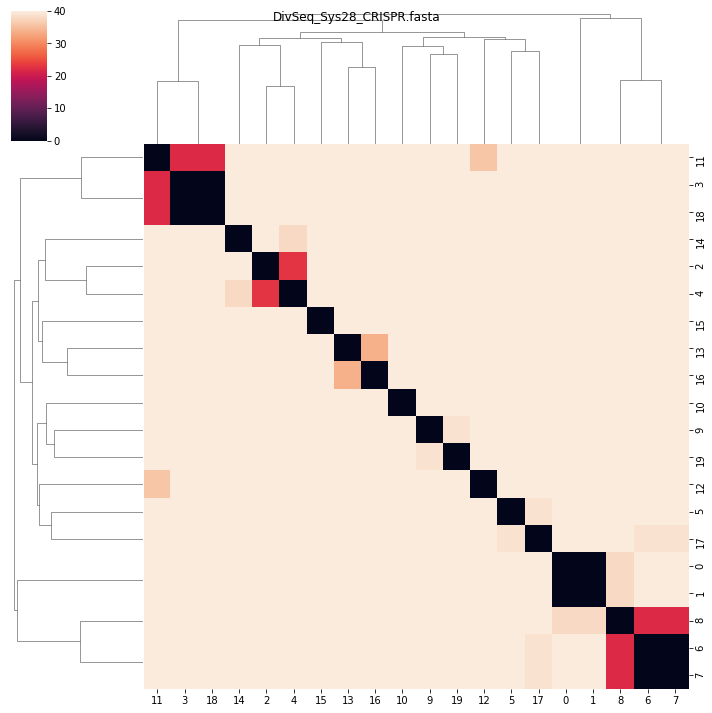

In [7]:
#Plot edit distance matrix for only CRISPRs
for index in range(len(names)):
    if names[index].endswith("CRISPR.fasta"):
        name = names[index]
        file = fastadata[index]
        #Initialize and propagate entries in distance matrix
        distancematrix = np.zeros((len(file),len(file)))
        for i in range(len(file)):
            for j in range(len(file)-i):
                distance = hamdist(file[i], file[len(file)-j-1])
                distancematrix[i, len(file)-j-1] = distance
                distancematrix[len(file)-j-1, i] = distance
        sns.clustermap(distancematrix, vmin = 0, vmax = 40).fig.suptitle(name) 

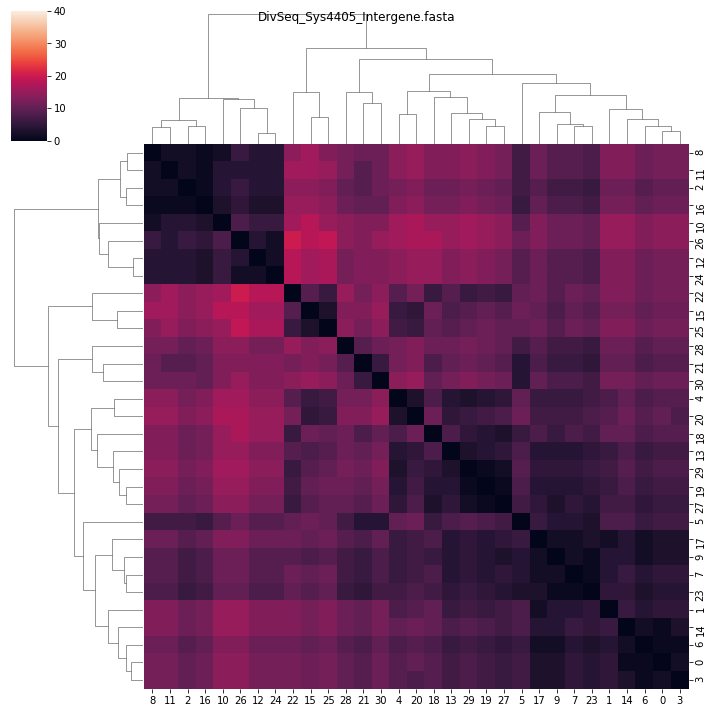

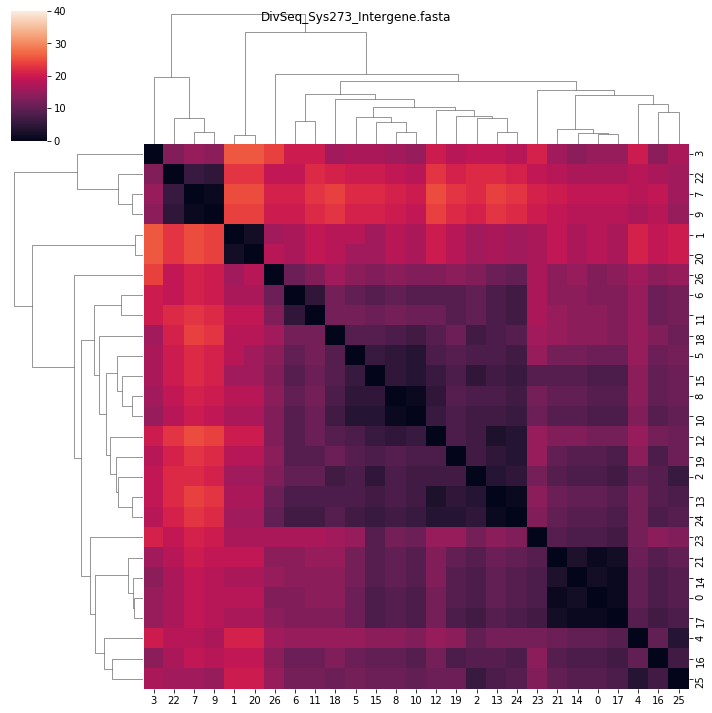

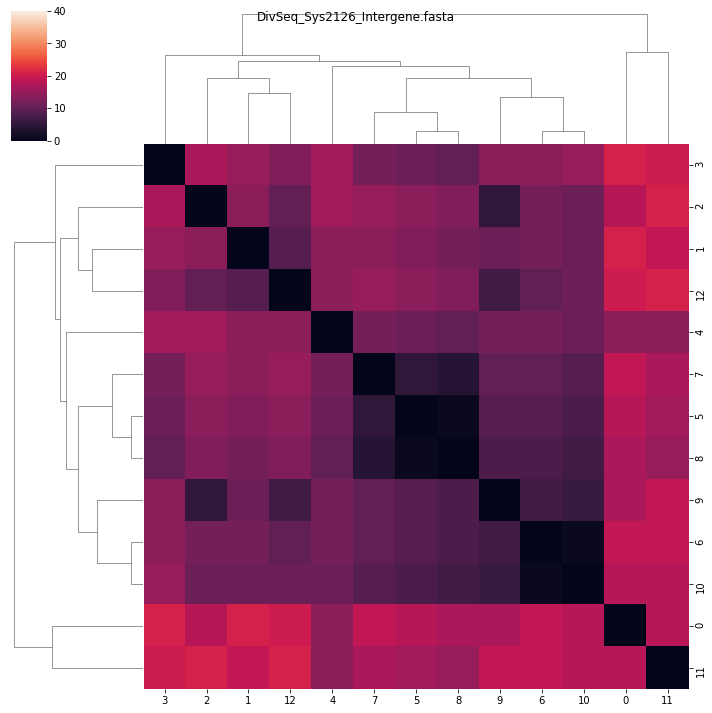

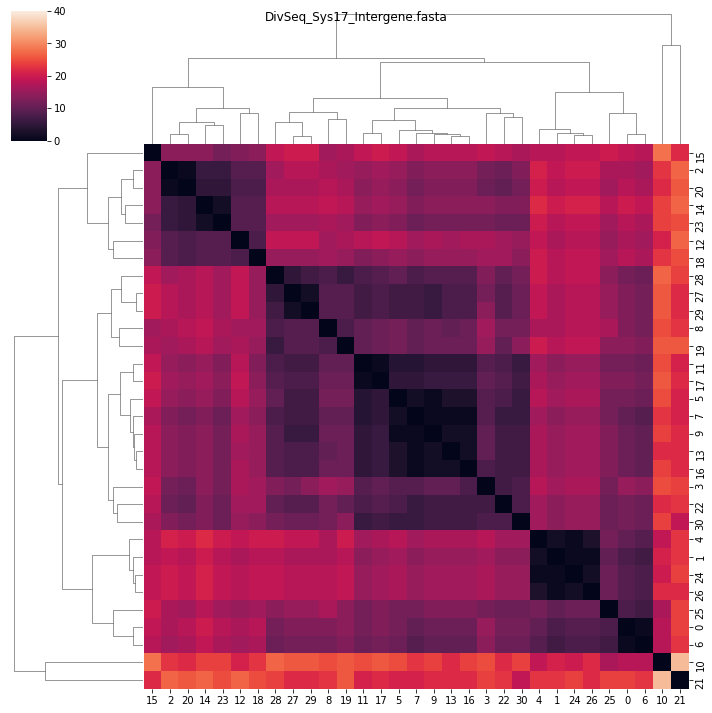

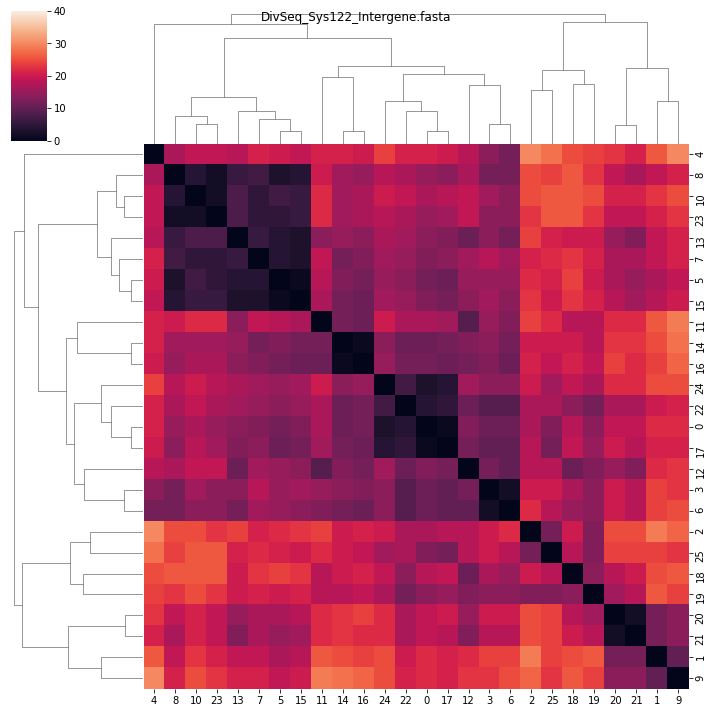

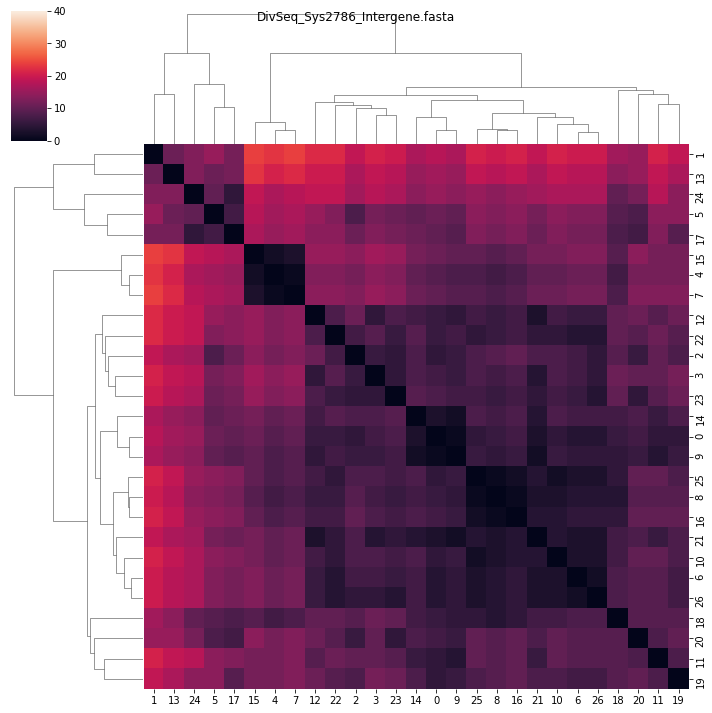

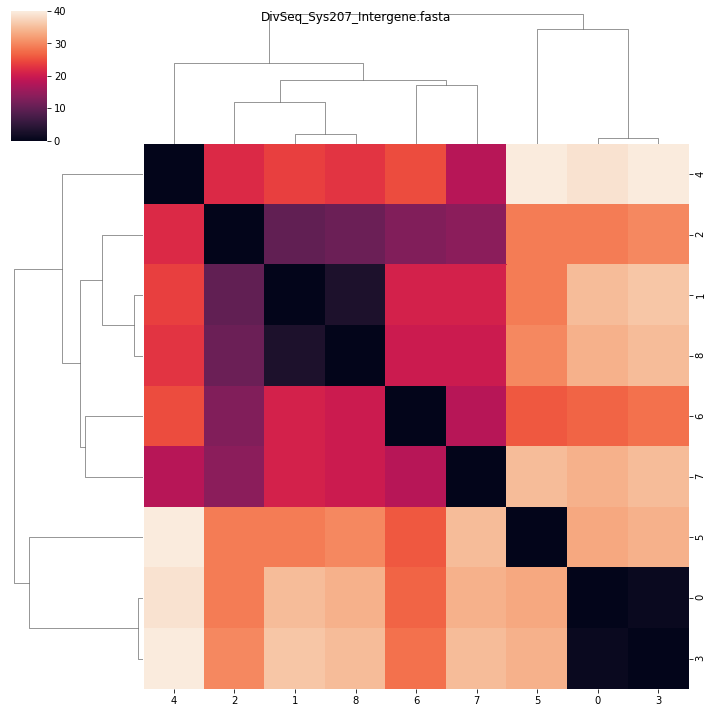

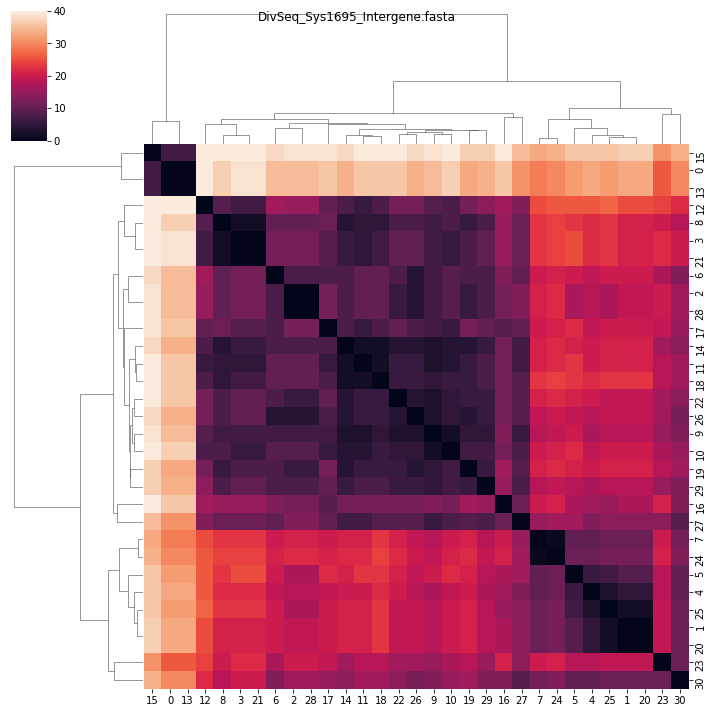

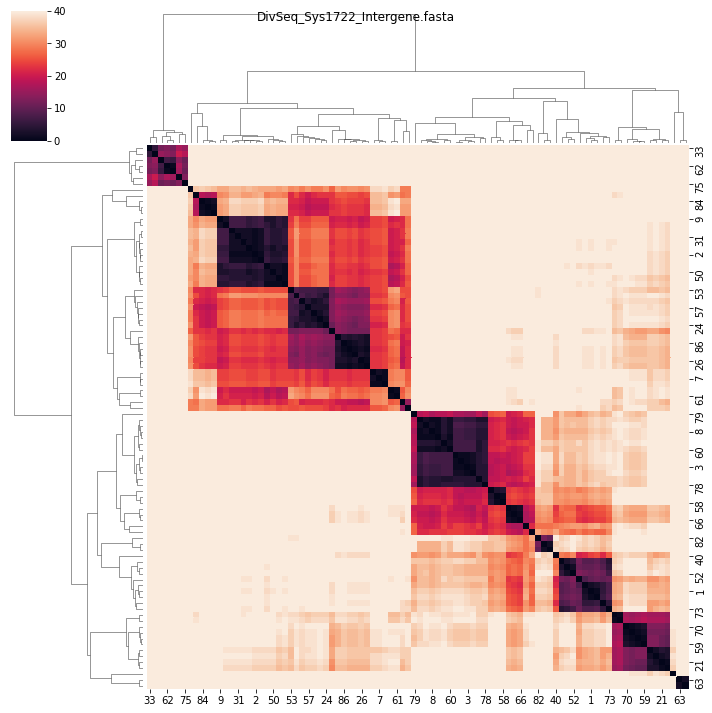

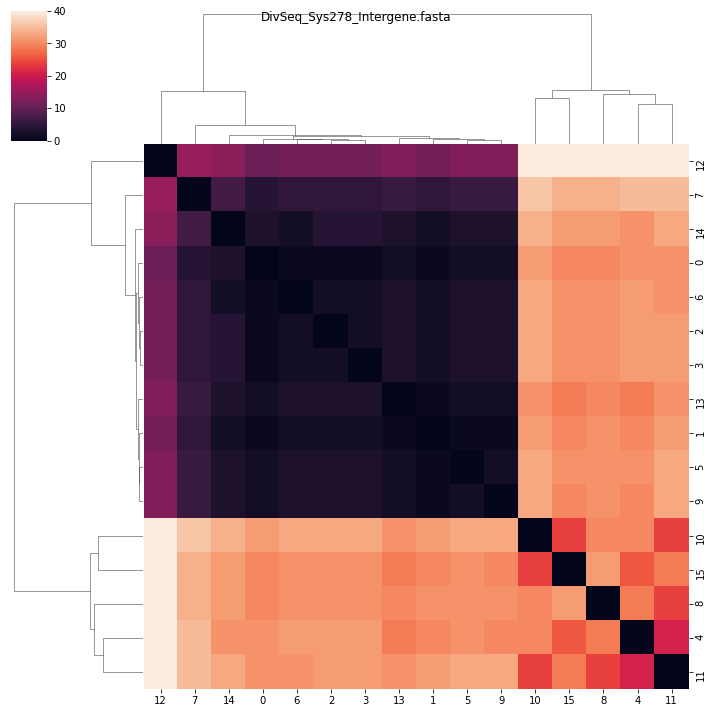

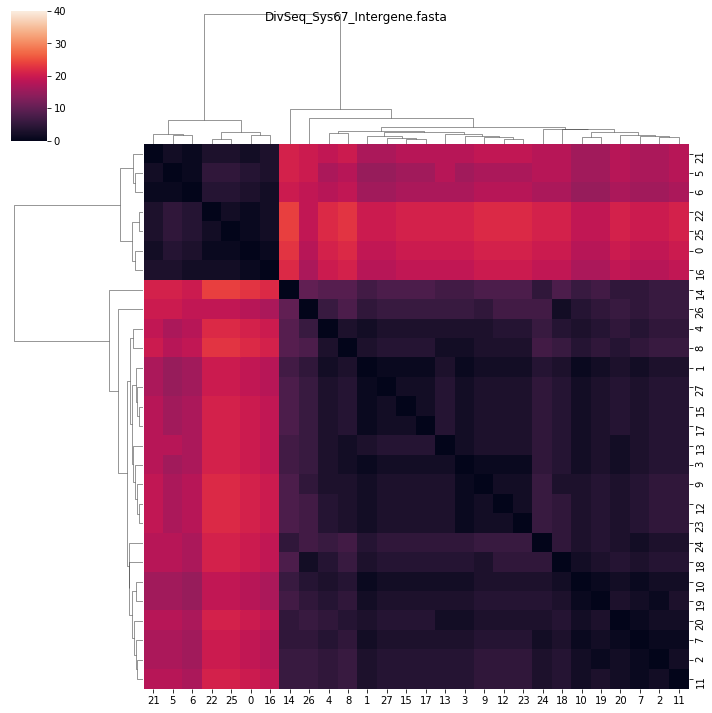

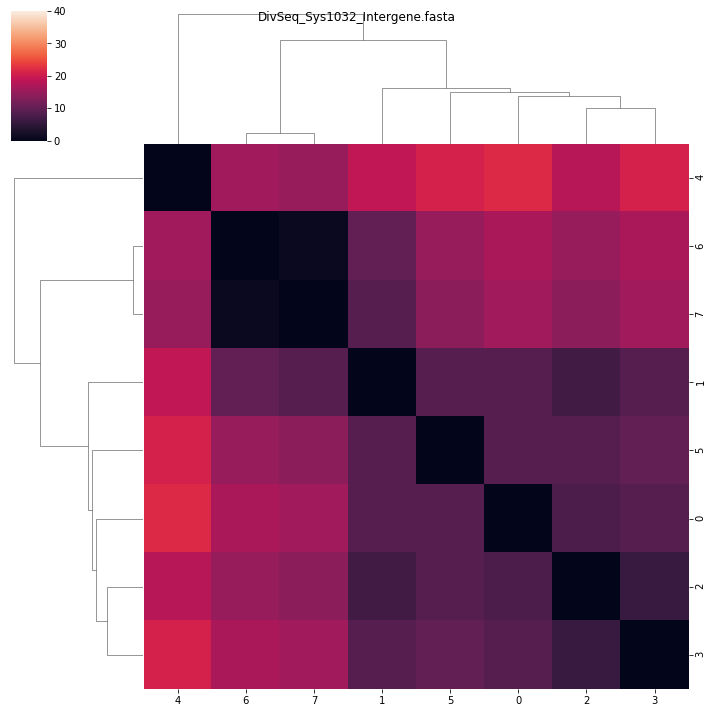

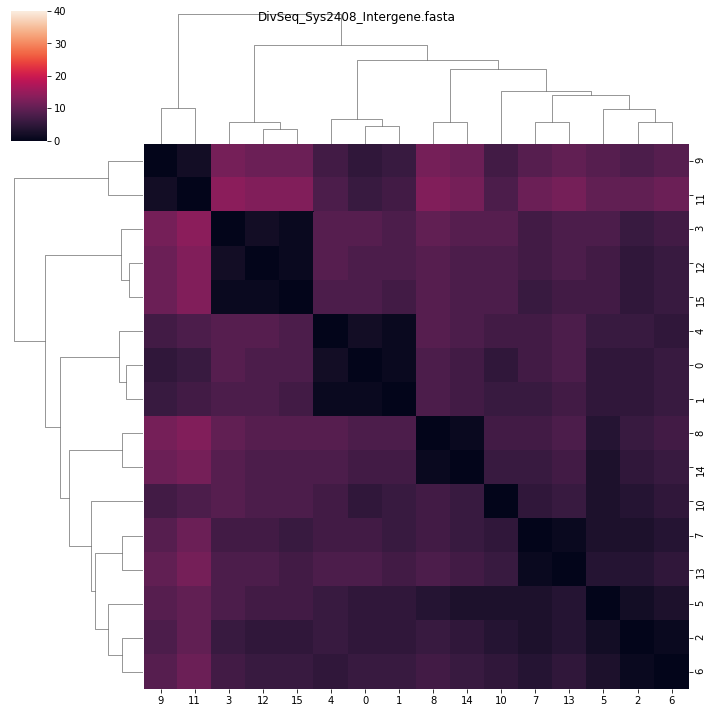

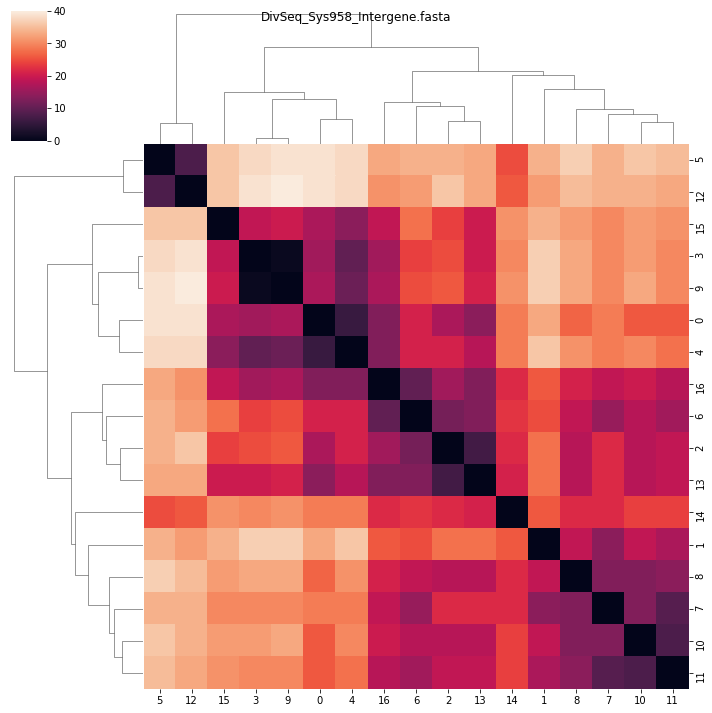

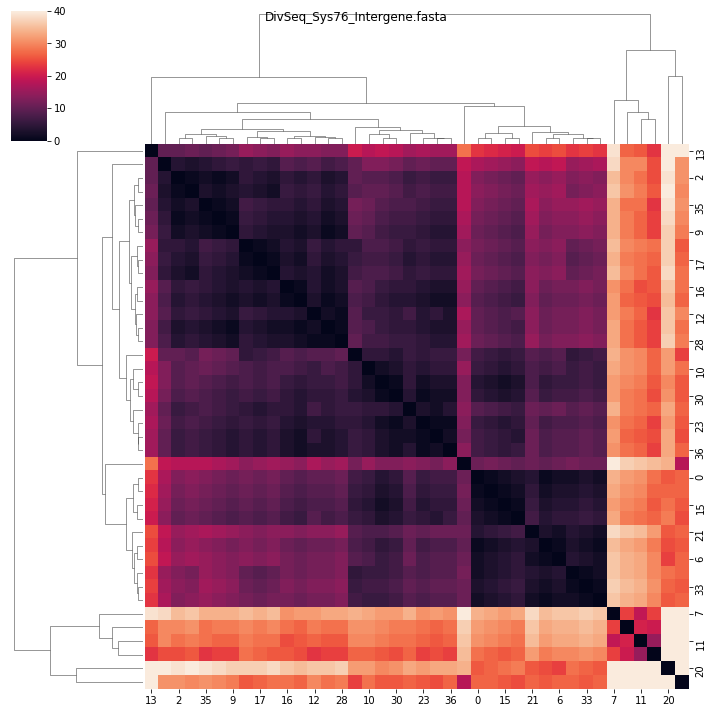

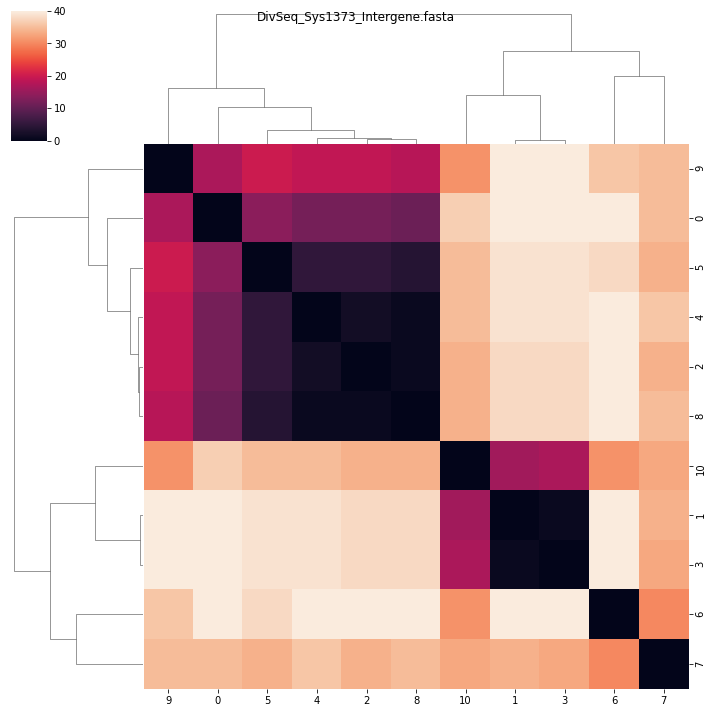

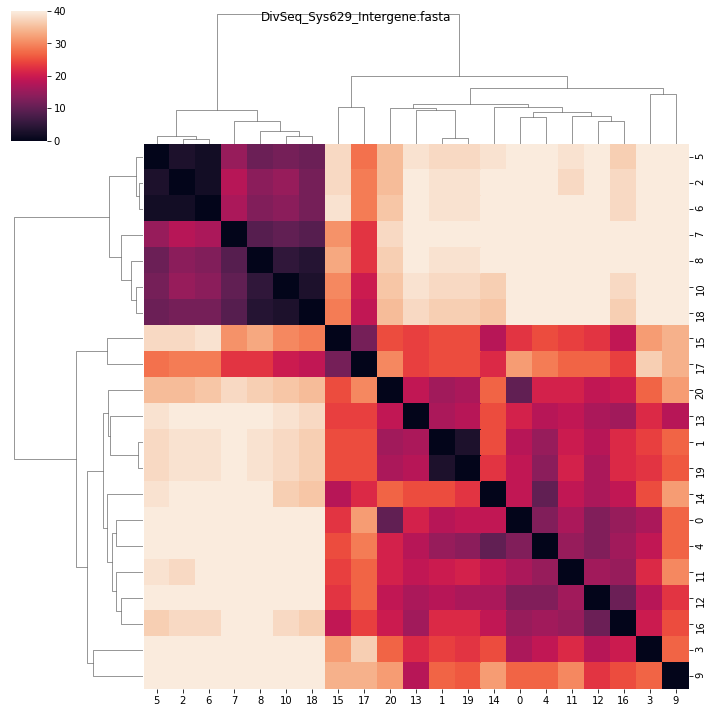

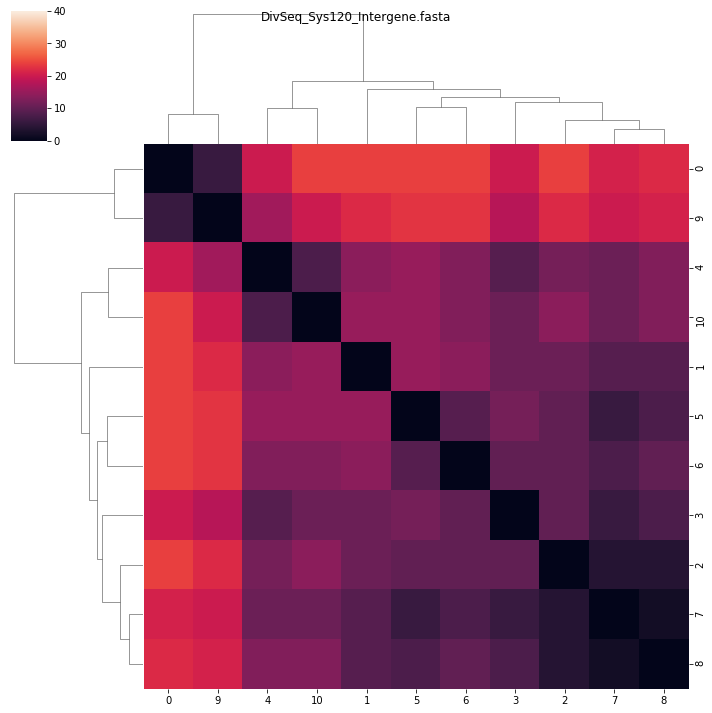

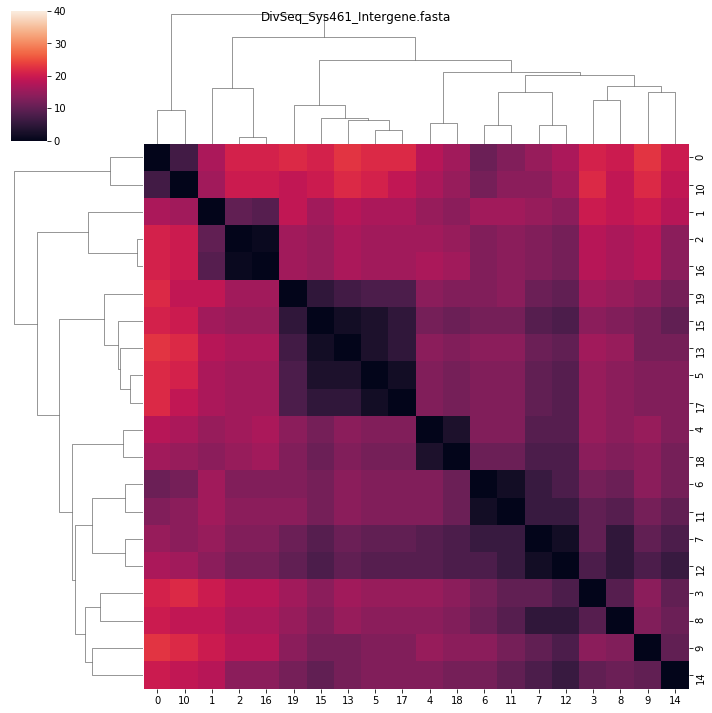

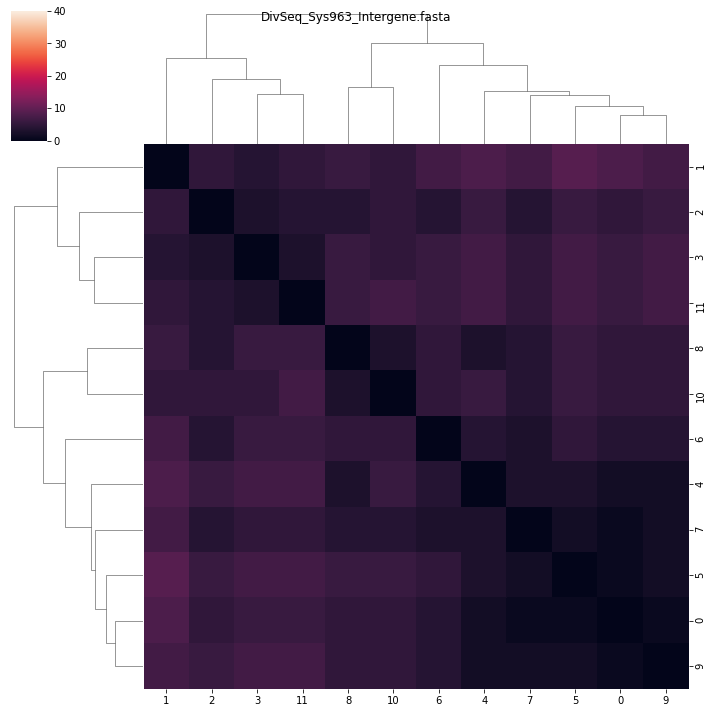

In [8]:
#Plot edit distance matrix for only systems with diversified regions in intergenic regions
for index in range(len(names)):
    if names[index].endswith("Intergene.fasta"):
        name = names[index]
        file = fastadata[index]
        #Initialize and propagate entries in distance matrix
        distancematrix = np.zeros((len(file),len(file)))
        for i in range(len(file)):
            for j in range(len(file)-i):
                distance = hamdist(file[i], file[len(file)-j-1])
                distancematrix[i, len(file)-j-1] = distance
                distancematrix[len(file)-j-1, i] = distance
        sns.clustermap(distancematrix, vmin = 0, vmax = 40).fig.suptitle(name) 

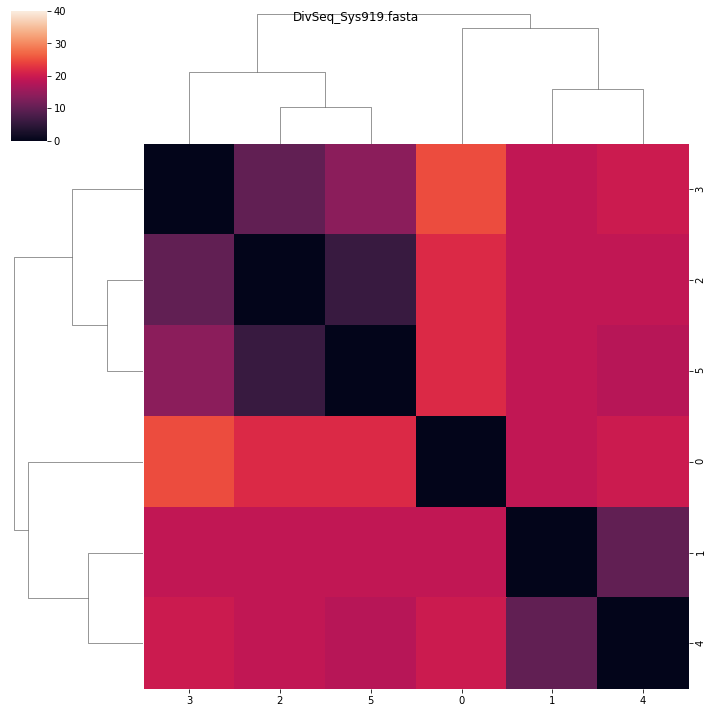

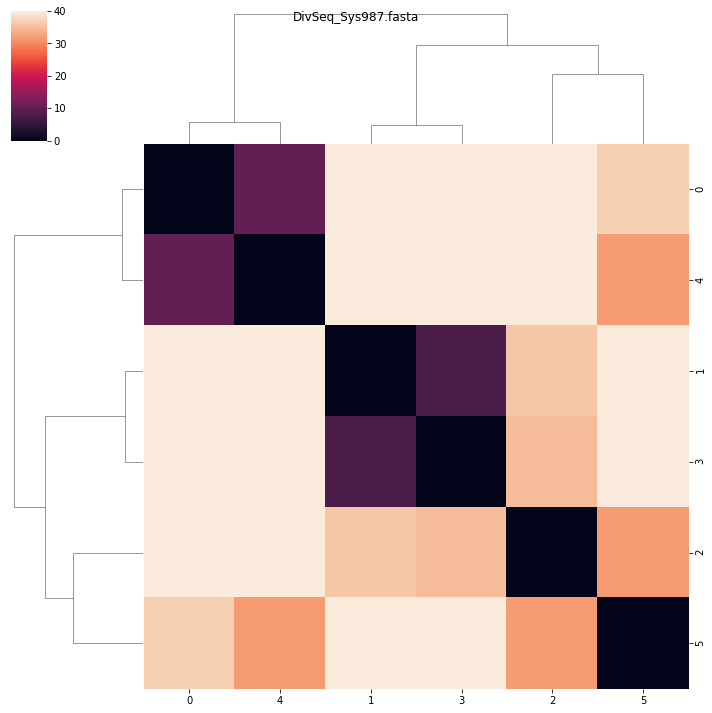

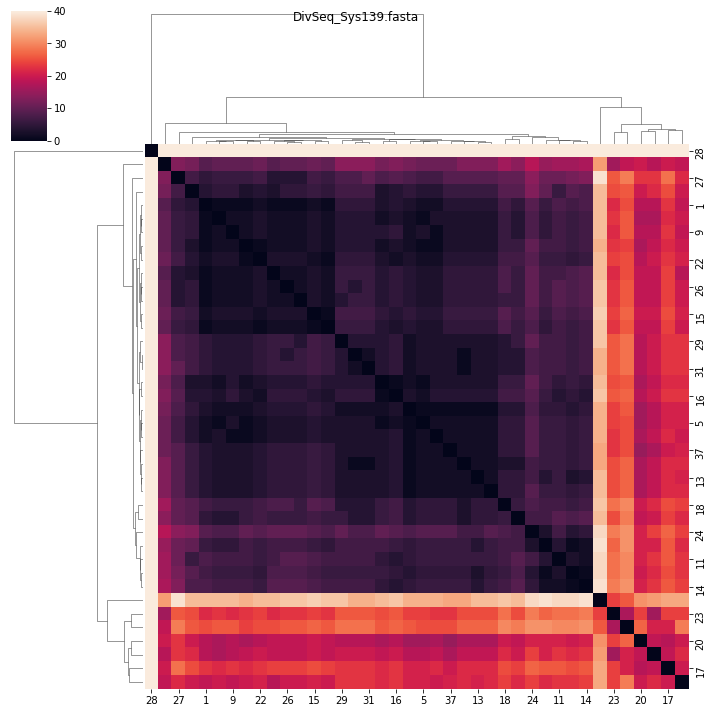

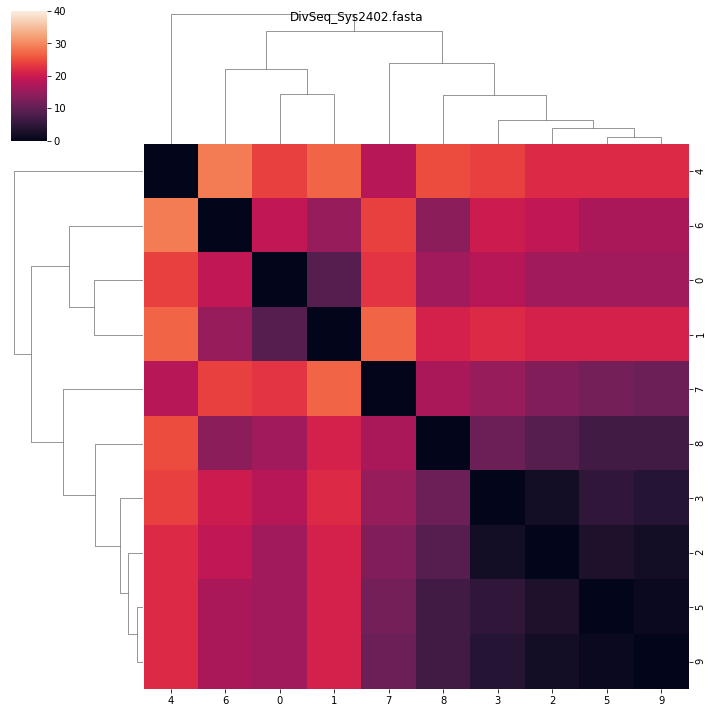

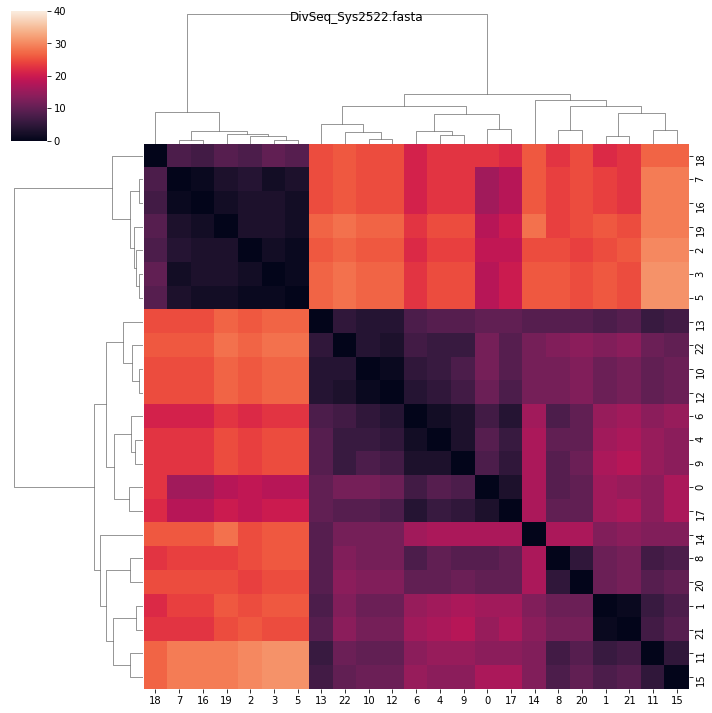

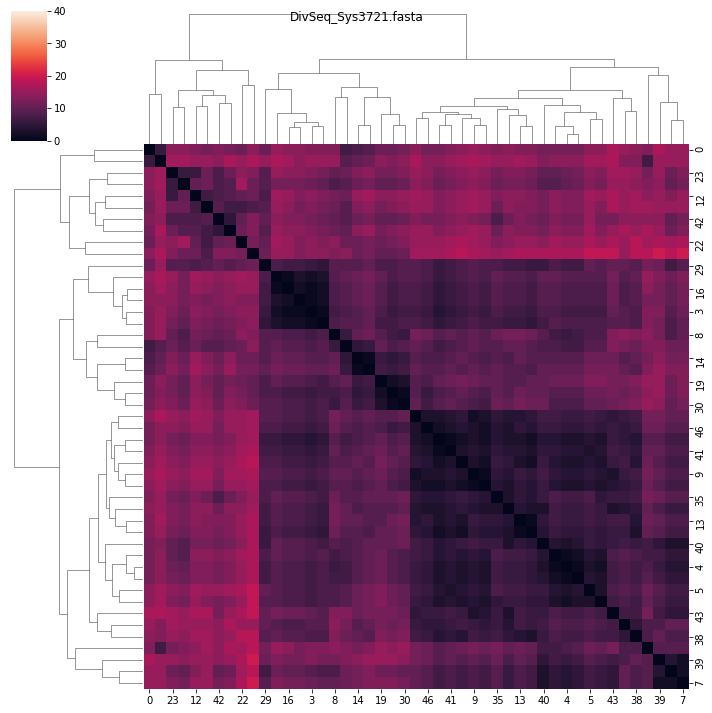

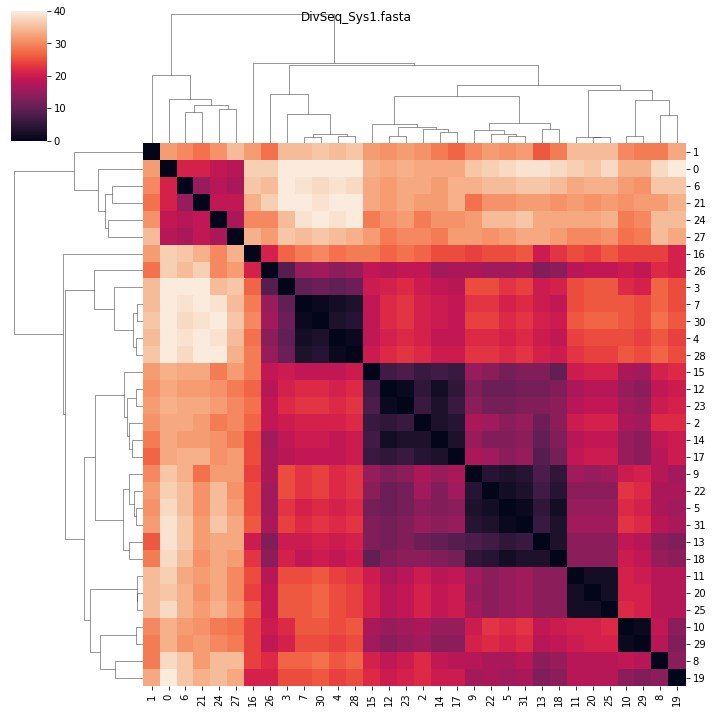

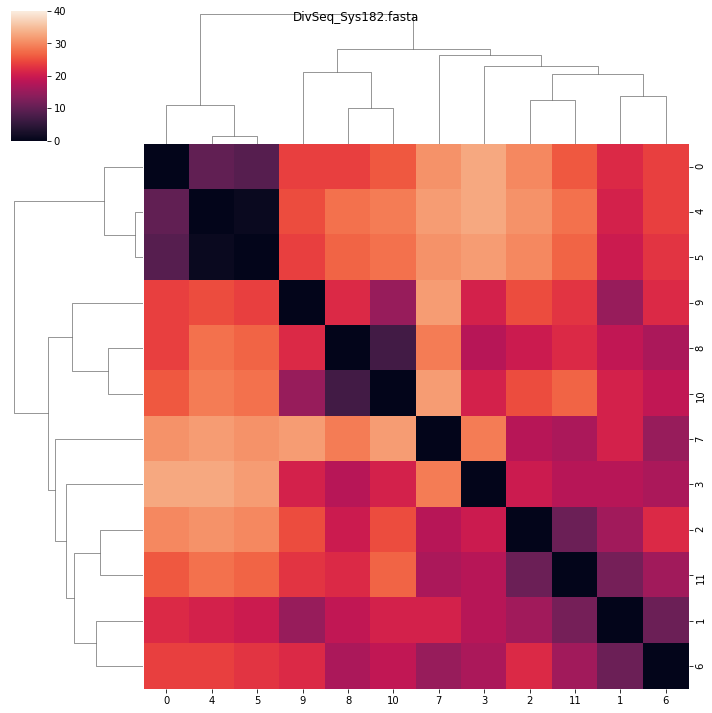

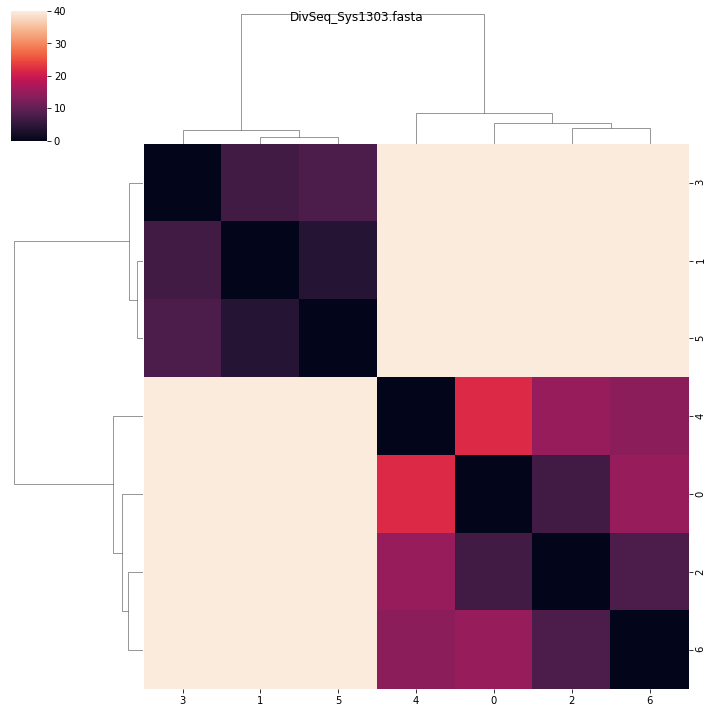

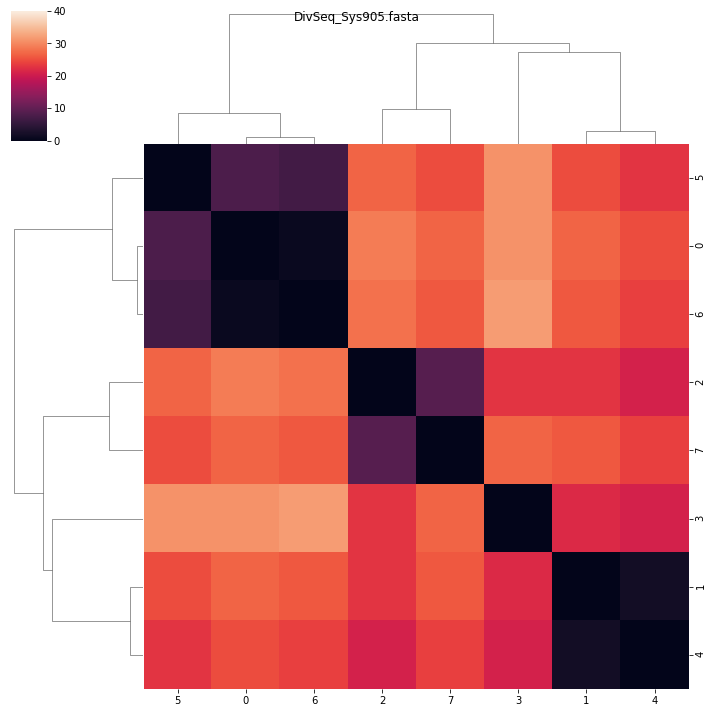

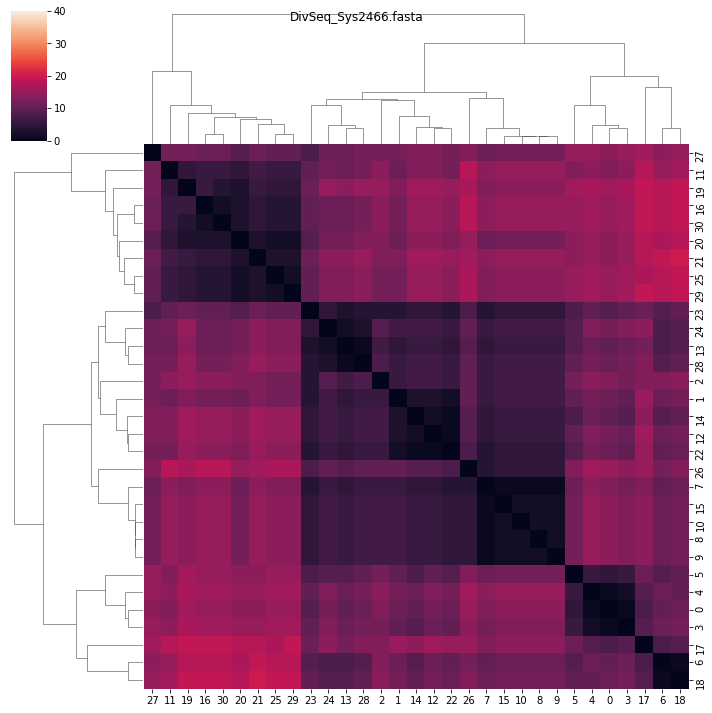

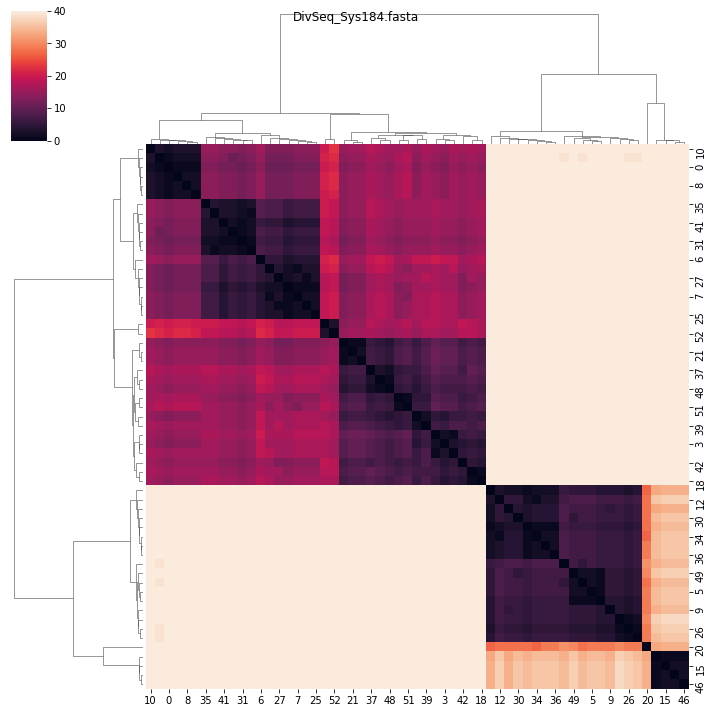

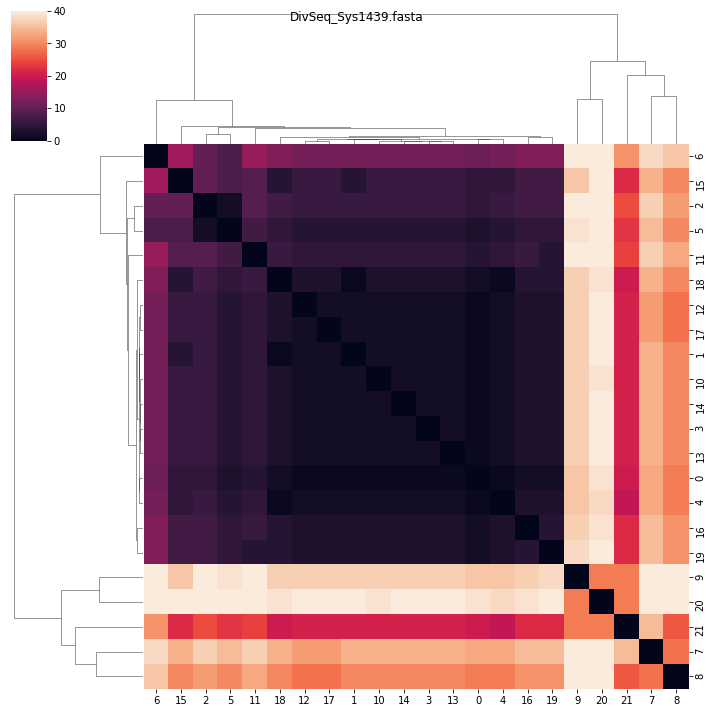

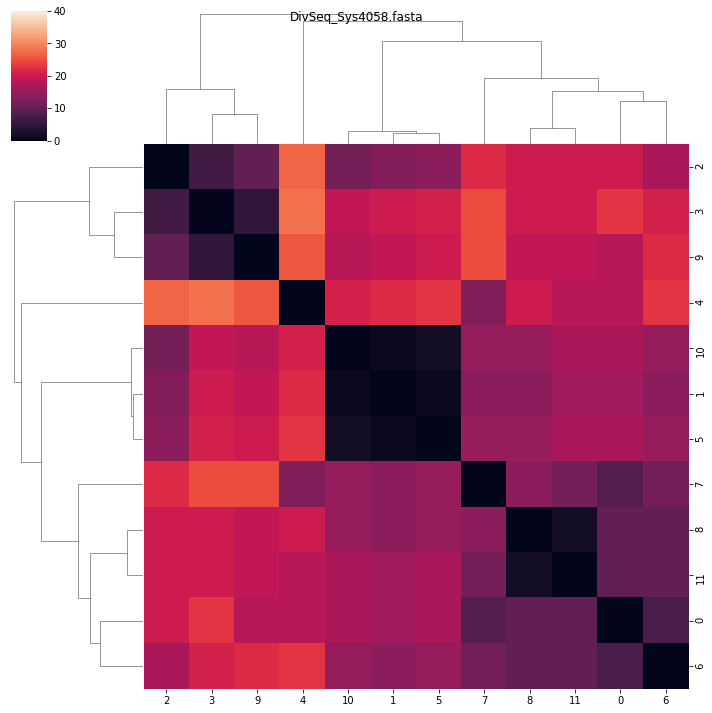

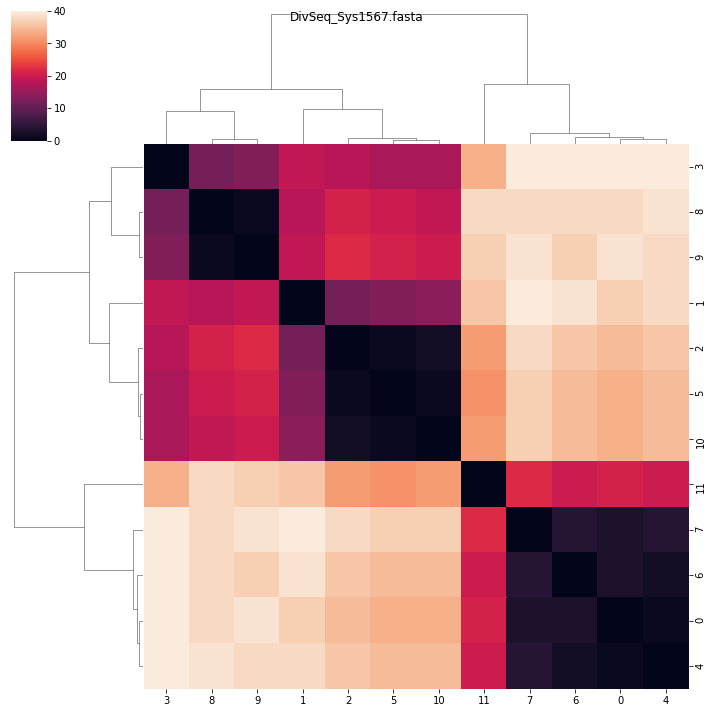

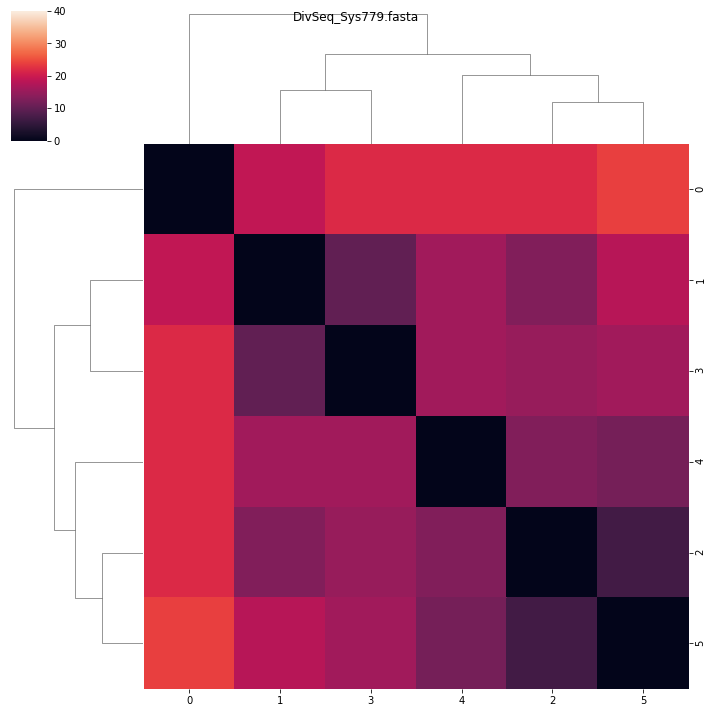

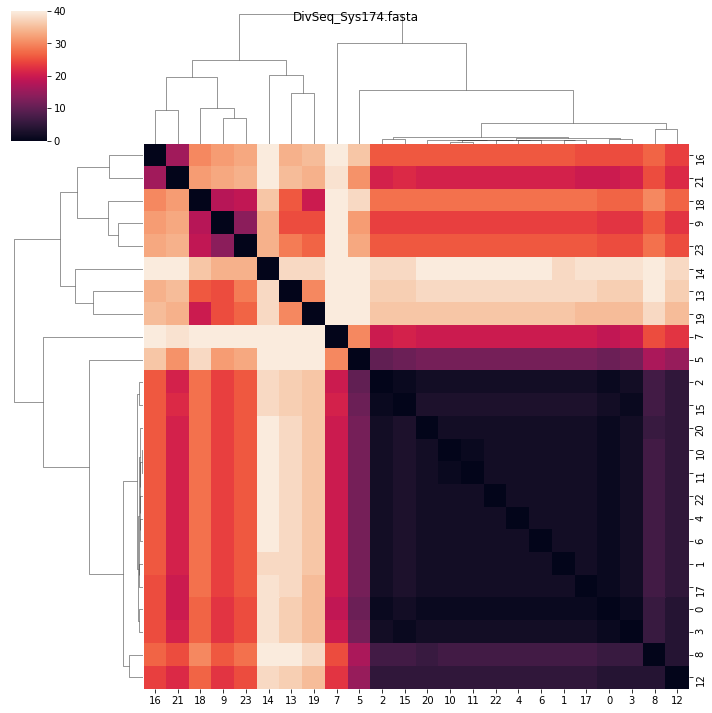

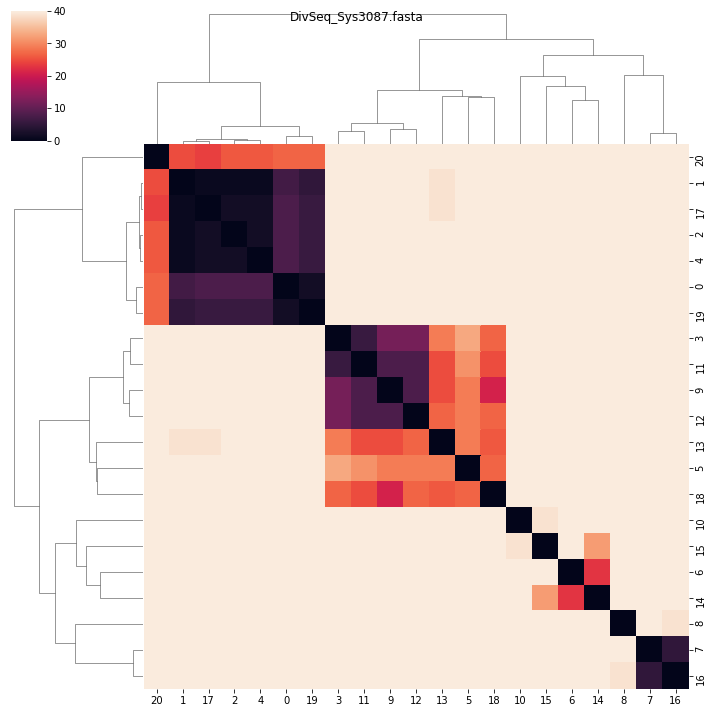

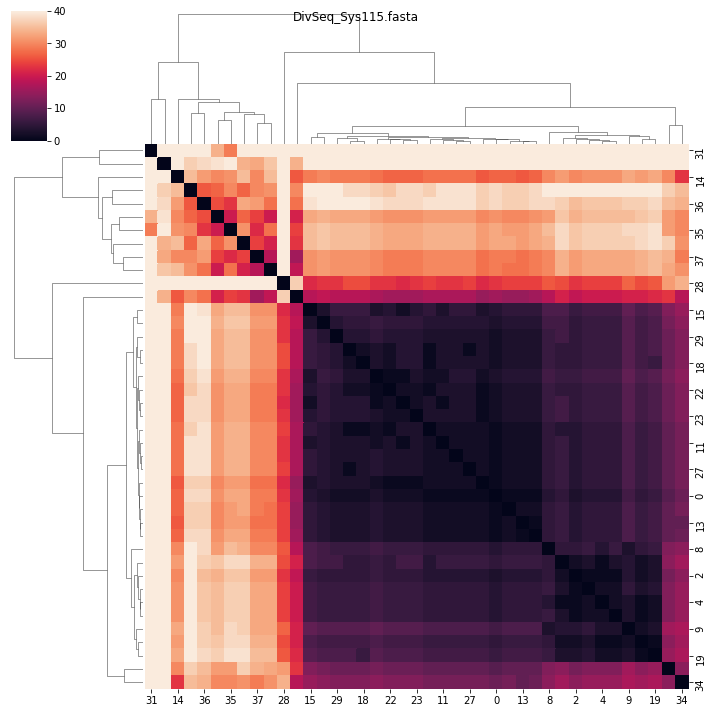

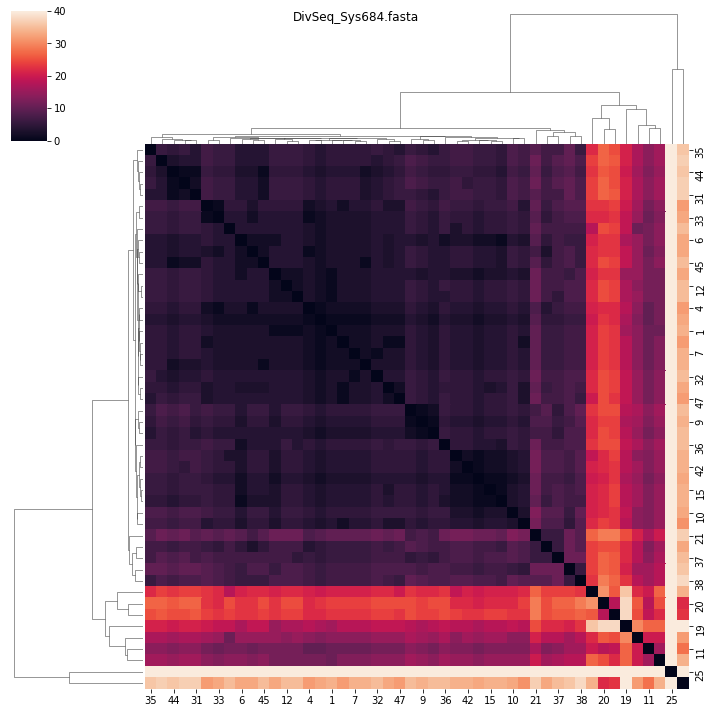

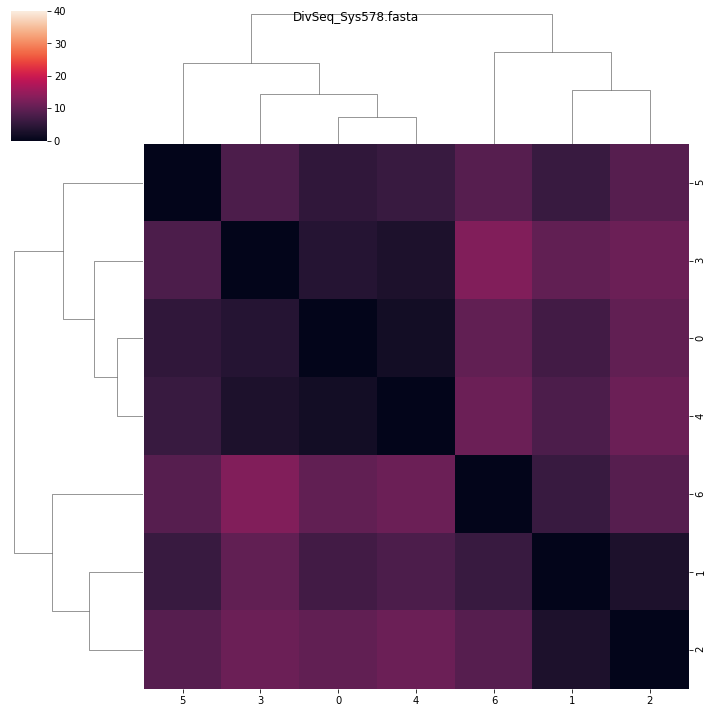

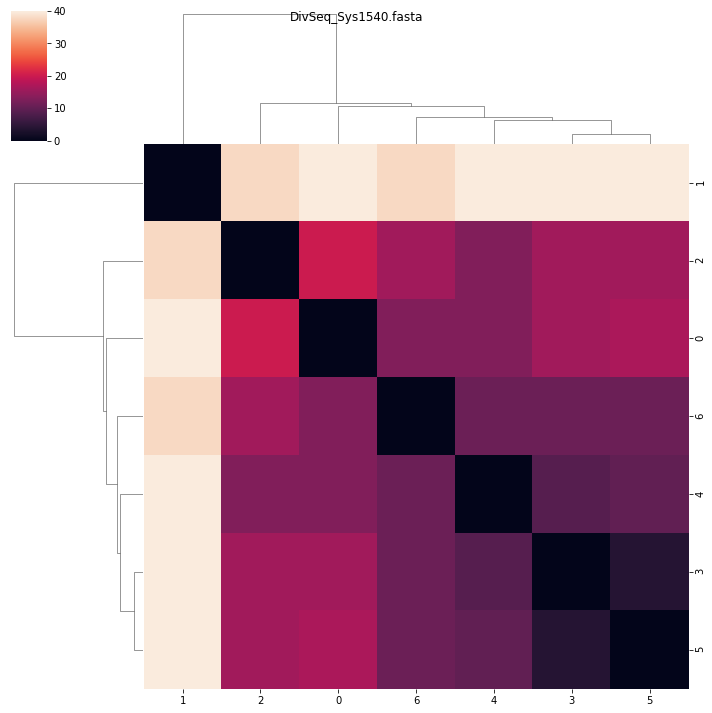

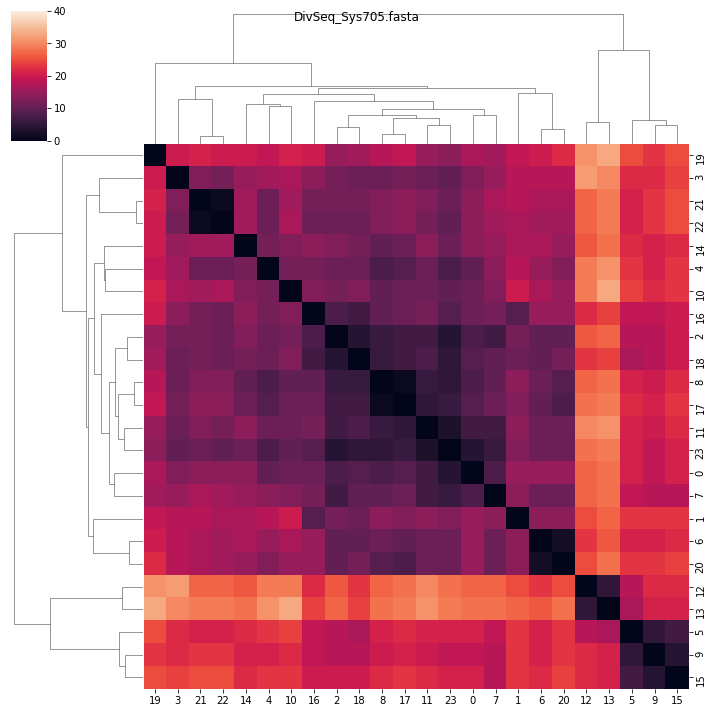

In [9]:
#Plot edit distance matrix for only systems with diversified regions in genes
for index in range(len(names)):
    if not names[index].endswith("Intergene.fasta") and not names[index].endswith("DGR.fasta") and not names[index].endswith("CRISPR.fasta"):
        name = names[index]
        file = fastadata[index]
        #Initialize and propagate entries in distance matrix
        distancematrix = np.zeros((len(file),len(file)))
        for i in range(len(file)):
            for j in range(len(file)-i):
                distance = hamdist(file[i], file[len(file)-j-1])
                distancematrix[i, len(file)-j-1] = distance
                distancematrix[len(file)-j-1, i] = distance
        sns.clustermap(distancematrix, vmin = 0, vmax = 40).fig.suptitle(name)

## Possible scores:

- Average edit distance (mean or median)
- Average edit distance > than a threshold
- Number of clusters with > threshold mean edit distance
- Somehow should be dependent on number of unique sequences

In [10]:
#Compute test scores for all systems

#Initialize list
score1 = []
score2 = []
score3 = []
score4 = []

for index in range(len(names)):
    name = names[index]
    file = fastadata[index]
    #Initialize and propagate entries in distance matrix
    distancematrix = np.zeros((len(file),len(file)))
    for i in range(len(file)):
        for j in range(len(file)-i):
            distance = hamdist(file[i], file[len(file)-j-1])
            distancematrix[i, len(file)-j-1] = distance
            distancematrix[len(file)-j-1, i] = distance
    
    #Score 1 is just mean edit distance
    score1.append(np.mean(distancematrix))
    
    #Score 2 is mean thresholded edit distance
    trulydistant = distancematrix > 2
    if trulydistant.any():
        scoretwo = distancematrix[trulydistant].mean()
    else:
        scoretwo = 0
    score2.append(scoretwo)
    
    #Score 3 is proportion of distances > 4
    score3.append(np.sum(distancematrix>5)/np.sum(distancematrix>0))
    
    #Score 4 is median edit distance
    score4.append(np.median(distancematrix))

print(score1)
print(score2)
print(score3)
print(score4)

[14.555555555555555, 8.980228928199791, 12.905349794238683, 34.05555555555556, 13.7, 14.48, 15.497164461247637, 9.598008148483476, 15.382716049382717, 22.056640625, 17.568040166204987, 12.023668639053254, 43.47868094938038, 20.36111111111111, 28.693877551020407, 19.375, 13.741935483870968, 16.17751479289941, 10.445369406867846, 9.969821673525377, 28.033898305084747, 22.864197530864196, 16.892819979188346, 40.05174858223062, 15.768595041322314, 18.1484375, 9.34438775510204, 11.28125, 41.465, 14.73611111111111, 6.40625, 23.093425605536332, 14.17, 25.735537190082646, 23.61111111111111, 27.514739229024944, 12.677685950413224, 14.446280991735538, 19.65432098765432, 13.61111111111111, 19.51388888888889, 39.46031746031746, 19.604997025580012, 11.6015625, 6.571428571428571, 17.836734693877553, 15.951183431952662, 15.677083333333334, 12.645, 4.472222222222222]
[17.466666666666665, 9.715909090909092, 13.719298245614034, 40.86666666666667, 15.523672883787661, 17.11904761904762, 16.867768595041323

## Issues

Unsure what to weight. For example:
- Strong amortized diversity?
- A few instances with strong diversity?
- How much does initial number of sequences matter?
-
Need clear metrics for an interesting system to define a useful score

In [15]:
print(names)

['DivSeq_Sys919.fasta', 'DivSeq_Sys4405_Intergene.fasta', 'DivSeq_Sys273_Intergene.fasta', 'DivSeq_Sys987.fasta', 'DivSeq_Sys139.fasta', 'DivSeq_Sys2402.fasta', 'DivSeq_Sys2522.fasta', 'DivSeq_Sys3721.fasta', 'DivSeq_Sys88_TransDGR.fasta', 'DivSeq_Sys1.fasta', 'DivSeq_Sys769_DGR.fasta', 'DivSeq_Sys2126_Intergene.fasta', 'DivSeq_Sys86_CRISPR.fasta', 'DivSeq_Sys182.fasta', 'DivSeq_Sys1303.fasta', 'DivSeq_Sys905.fasta', 'DivSeq_Sys17_Intergene.fasta', 'DivSeq_Sys122_Intergene.fasta', 'DivSeq_Sys2466.fasta', 'DivSeq_Sys2786_Intergene.fasta', 'DivSeq_Sys184.fasta', 'DivSeq_Sys207_Intergene.fasta', 'DivSeq_Sys1695_Intergene.fasta', 'DivSeq_Sys1722_Intergene.fasta', 'DivSeq_Sys1439.fasta', 'DivSeq_Sys278_Intergene.fasta', 'DivSeq_Sys67_Intergene.fasta', 'DivSeq_Sys1032_Intergene.fasta', 'DivSeq_Sys28_CRISPR.fasta', 'DivSeq_Sys4058.fasta', 'DivSeq_Sys2408_Intergene.fasta', 'DivSeq_Sys958_Intergene.fasta', 'DivSeq_Sys76_Intergene.fasta', 'DivSeq_Sys1373_Intergene.fasta', 'DivSeq_Sys1567.fasta',